<h1><center>Laboratorio 10: Adivina, Adivinador 🔮</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2025</strong></center>

### Cuerpo Docente:

- Profesores: Diego Cortez, Gabriel Iturra
- Auxiliares: Melanie Peña, Valentina Rojas
- Ayudantes: Nicolás Cabello, Cristopher Urbina

### **Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados**

- Nombre de alumno 1: Sebastian Calderon Altamirano
- Nombre de alumno 2: Camila Vera Gallardo

### **Link de repositorio de GitHub:**
[Repo Sebastian Calderon](https://github.com/eldiddy/eldiddy.git)
[Repo Camila Vera](https://github.com/cxmilavg/cxmilavg.git)

## Temas a tratar
- Series de Tiempo.
- Predicciones vía `Prophet`.
- Implementar un sistema de recomendación utilizando `surprise`.

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: Entregas Miercoles a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda **fuertemente** asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.

### Objetivos principales del laboratorio
- Comprender qué es una serie de tiempo y su estructura.
- Identificar tendencias, estacionalidades e irregularidades.
- Armar un modelo predictivo para la serie.
- Conocer y aplicar sistemas de recomendación.
- Entender estructura y conocer casos de estudio.


In [7]:
!pip install numpy==1.26

In [8]:
# Librerias globales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import plotly.express as px

In [9]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **1. Forecasting (30 puntos)**


## **Prophet**

Prophet es una herramienta open-source de Facebook utilizada para realizar predicciones en series de tiempo. Esta se basa en la descomposición aditiva, donde tendencias no lineales se ajustan junto a la estacionalidad.

En la ecuación de a continuación se puede ver una idea general de los elementos que construyen a un modelo aditivo como lo es Prophet.

\begin{equation}
y(t) = g(t) + s(t) + h(t) + e(t)
\end{equation}

Donde, $g(t)$ hace referencia a las tendencias, que corresponden a cambios graduales en largos periodos de tiempo. $s(t)$ corresponde a la estacionalidad, son cambios periodicos o cortos en el tiempo. $h(t)$ es el efecto que tienen las festividades sobre las predicciones, mientras que e(t) corresponde al error o ruido. Finalmente $y(t)$, es la predicción hecha por el modelo.

Prophet trabaja por defecto con Piece-Wise Lineal Model, este es un modelo de regresión lineal, en el cual se buscan distintas zonas en que la data presente patrones o tendencias lineales, de estas zonas obtiene su regresión y luego las "une" de manera de representar toda la región, como se puede ver en la ecuación siguiente.

\begin{equation}
y(x)=
    \begin{cases}
        η_1 + \beta_1(x-b_1), & b_1 < x  \leqslant b_2 \\
        η_2 + \beta_2(x-b_2), & b_2 < x  \leqslant b_3 \\
        η_3 + \beta_3(x-b_3), & b_3 < x  \leqslant b_3 \\
        ... \\
        η_k + \beta_{nb}(x-b_{nb-1}), & b_{n-1} < x  \leqslant b_{nb} \\
    \end{cases}
\end{equation}

Siendo $b_1$ el primer punto de quiebre en la serie y así hasta el punto $b_{nb}$ correspondiente al último punto de quiebre de la serie con una cantidad $nb$ de puntos.

Para mayor información de Prophet y como utilizarla, pueden ver su [documentación](https://facebook.github.io/prophet/docs/quick_start.html#python-api), donde hay pueden encontrar un pequeño tutorial de la librería.

## **La Factura de Homero**

<center>
<img src ="https://i.makeagif.com/media/7-30-2018/H_ZAY1.gif" width = 500 />

Homero Simpson ha trabajado en la Planta Nuclear de Springfield por más de 20 años como Inspector de Seguridad, pero recientemente el Sr. Burns le ha permitido trabajar desde casa. Aunque le encanta la flexibilidad que esto le otorga, también ha notado un aumento considerable en su consumo energético en el hogar. Con el uso constante de calefacción en invierno y aire acondicionado en verano, Homero está preocupado por cómo afectará esto a su presupuesto en los próximos meses, ya que planea pasar aún más tiempo en casa.

Afortunadamente, gracias a su puesto en la Planta de Energía Nuclear, Homero tiene acceso a los datos de consumo de energía de cada ciudadano en Springfield, por lo que accede a esta información y almacena el consumo de su hogar en un archivo llamado `energia_homero.csv`. Este archivo posee el consumo diario en el hogar de Homero Simpson desde el Junio del 2016 hasta Julio del 2020.

Con esta valiosa información, Homero espera poder predecir su consumo energético y tomar decisiones informadas para ajustar su presupuesto mensual.

Los datos son los siguientes:

* **date**: Fecha de medición.
* **Energy_kWh**: Consumo diario de energía eléctrica en el hogar de Homero (en kWh).

## 1.1 Series de Tiempo [0 puntos]

### Carga de los datos

En primer lugar, cargue los datos históricos del archivo `energia_homero.csv` al entorno de trabajo. Una vez cargados, asegúrense de transformar la columna `date` a formato `datetime`. Además, visualice el consumo de energía en la casa de Homero mediante la librería `plotly`.


**Respuesta**:

In [10]:
# 1. Cargar el dataset
path = '/content/drive/MyDrive/MDS7202/energia_homero.csv'
df = pd.read_csv(path)
df.head()

,date,Energy_kWh
0,2016-06-01,29.691
1,2016-06-02,28.789
2,2016-06-03,19.247
3,2016-06-04,22.883
4,2016-06-05,25.195


In [11]:
# 2. Transformar la columna 'date' a formato datetime
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# 3. Visualizacion del consumo de energia
fig = px.line(df,
              x='date',
              y='Energy_kWh',
              title='Consumo diario de energía en el hogar de Homero Simpson (2016–2020)',
              labels={'date': 'Fecha', 'Energy_kWh': 'Consumo (kWh)'})
fig.show()

## 1.2 Controlando la Serie de Tiempo [6 puntos]

<center>
<img src ="https://i.pinimg.com/originals/66/77/88/667788e0b1f08ff1e1cfce11d303b203.gif" width = 500 />

Luego de leer mucho, Homero cree que necesita descomponer la serie de tiempo para poder controlar estos componentes de forma efectiva y lograr que la serie tenga propiedades de una serie estacionaria.

Usted, como buen ciudadano de Springfield, decide ayudar a Homero, el cual le pide que realice lo siguientes pasos:

0. Cree un conjunto de entrenamiento y uno de prueba (a proyectar). Para ello, considere como entrenamiento la información **hasta** el `2020-02-29` y como conjunto de prueba **desde** el `2020-03-01`. [0 puntos]
1. Cree un `Pipeline` que permita obtener una representación de la tendencia de la serie de tiempo, mediante un modelo Lineal. Nombre al pipeline `Pipeline_trend`. [1 punto]
2. Entrene el modelo lineal y luego obtenga predicciones tanto para el conjunto de entrenamiento como para el de prueba (intervalo completo de tiempo). Luego grafique las predicciones y calcule el `Mean Absolute Error` (MAE), tanto para el conjunto de prueba como para el de entrenamiento. [1 punto]
3. Grafique el error (Valor real - Valor predicho) para todo el intervalo de tiempo y responda ¿Hay un comportamiento estacional en la serie? [1 punto]
4.  Cree un `Pipeline` que permita modelar la estacionalidad de la serie temporal mediante términos de Fourier y la represente a través de una Regresión Lineal de la variable objetivo. Nombre a este pipeline `Pipeline_seasonal`. Determine el valor de Periodos `P` y el número de terminos de Fourier `n`. [1 punto]
5. Entrene el nuevo modelo y obtenga predicciones en el intervalo completo de tiempo. Luego grafique y calcule el `MAE` en el conjunto de prueba y en el de entrenamiento. [1 punto]
6. Vuelva a graficar el error y comente los resultados. [1 punto]

**Respuesta**

In [12]:
# 0. Division del conjunto de datos en entrenamiento y prueba

# Definir fecha limite de separacion
fecha_corte = '2020-02-29'

# Crear conjuntos de entrenamiento y prueba
train = df[df['date'] <= fecha_corte].copy()
test = df[df['date'] > fecha_corte].copy()

# Verificar tamaños y rangos de fechas
print(f"Registros totales: {len(df)}")
print(f"Entrenamiento: {len(train)} registros | Desde {train['date'].min().date()} hasta {train['date'].max().date()}")
print(f"Prueba: {len(test)} registros | Desde {test['date'].min().date()} hasta {test['date'].max().date()}")

# Visualizacion para confirmar la separacion
import plotly.graph_objects as go

fig = go.Figure()

# Entrenamiento
fig.add_trace(go.Scatter(
    x=train['date'],
    y=train['Energy_kWh'],
    mode='lines',
    name='Entrenamiento',
    line=dict(color='blue')
))

# Prueba
fig.add_trace(go.Scatter(
    x=test['date'],
    y=test['Energy_kWh'],
    mode='lines',
    name='Prueba',
    line=dict(color='orange', dash='dash')
))

fig.update_layout(
    title='División de la serie en conjuntos de Entrenamiento y Prueba',
    xaxis_title='Fecha',
    yaxis_title='Consumo de energía (kWh)',
    template='plotly_white',
    legend=dict(x=0.02, y=0.98)
)

fig.show()

Registros totales: 1498
Entrenamiento: 1369 registros | Desde 2016-06-01 hasta 2020-02-29
Prueba: 129 registros | Desde 2020-03-01 hasta 2020-07-07


In [13]:
# 1. Creación del Pipeline para representar la tendencia lineal
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Crear una nueva columna con los días transcurridos desde el inicio (variable temporal numérica)
train = train.copy()
train['t'] = (train['date'] - train['date'].min()).dt.days.values.reshape(-1, 1)

# Definir el Pipeline de tendencia lineal
Pipeline_trend = Pipeline([
    ('scaler', StandardScaler()),                   # Escalar la variable temporal
    ('linear_model', LinearRegression())  # Ajustar modelo lineal
])

# Ajustar el Pipeline al conjunto de entrenamiento
X_train = train[['t']]
y_train = train['Energy_kWh']

Pipeline_trend.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_model', LinearRegression())])

In [14]:
# 2. Predicciones y evaluación del modelo lineal
from sklearn.metrics import mean_absolute_error

# Crear variable temporal 't' también en el conjunto de prueba
test = test.copy()
test['t'] = (test['date'] - train['date'].min()).dt.days.values.reshape(-1, 1)

# Predicciones para entrenamiento y prueba
train['trend_pred'] = Pipeline_trend.predict(train[['t']])
test['trend_pred'] = Pipeline_trend.predict(test[['t']])

# Calcular Mean Absolute Error (MAE)
mae_train = mean_absolute_error(train['Energy_kWh'], train['trend_pred'])
mae_test = mean_absolute_error(test['Energy_kWh'], test['trend_pred'])

print(f"Mean Absolute Error (Entrenamiento): {mae_train:.2f}")
print(f"Mean Absolute Error (Prueba): {mae_test:.2f}")

# Visualizacion
import plotly.graph_objects as go

fig = go.Figure()

# Datos reales
fig.add_trace(go.Scatter(x=train['date'], y=train['Energy_kWh'],
                         mode='lines', name='Entrenamiento (Real)',
                         line=dict(color='blue')))
fig.add_trace(go.Scatter(x=test['date'], y=test['Energy_kWh'],
                         mode='lines', name='Prueba (Real)',
                         line=dict(color='orange')))

# Predicciones lineales
fig.add_trace(go.Scatter(x=train['date'], y=train['trend_pred'],
                         mode='lines', name='Predicción Entrenamiento',
                         line=dict(color='blue', dash='dash')))
fig.add_trace(go.Scatter(x=test['date'], y=test['trend_pred'],
                         mode='lines', name='Predicción Prueba',
                         line=dict(color='orange', dash='dash')))

fig.update_layout(
    title='Predicción de la tendencia lineal — Entrenamiento vs Prueba',
    xaxis_title='Fecha',
    yaxis_title='Consumo de energía (kWh)',
    template='plotly_white',
    legend=dict(x=0.02, y=0.98)
)

fig.show()

Mean Absolute Error (Entrenamiento): 10.57
Mean Absolute Error (Prueba): 8.66


In [15]:
# 3. Análisis del error (residuos)
# Unir los conjuntos de entrenamiento y prueba para graficar todo el intervalo
df_error = pd.concat([train, test], axis=0)

# Calcular el error (Valor real - Valor predicho)
df_error['error'] = df_error['Energy_kWh'] - df_error['trend_pred']

fig = go.Figure()

# Línea del error
fig.add_trace(go.Scatter(
    x=df_error['date'],
    y=df_error['error'],
    mode='lines',
    name='Error (Valor real - Valor predicho)',
    line=dict(color='royalblue', width=1.5)
))

# Línea horizontal en 0
fig.add_trace(go.Scatter(
    x=[df_error['date'].min(), df_error['date'].max()],
    y=[0, 0],
    mode='lines',
    name='Línea base (error = 0)',
    line=dict(color='red', dash='dash')
))

# Personalización del gráfico
fig.update_layout(
    title='Error del modelo de tendencia lineal en todo el intervalo de tiempo',
    xaxis_title='Fecha',
    yaxis_title='Error (kWh)',
    template='plotly_white',
    legend=dict(x=0.02, y=0.98)
)

fig.show()

Podemos observar que el error (valor real − valor predicho) sigue un patrón recurrente cada año, con aumentos y disminuciones similares en las mismas épocas. En particular:

- Los peaks positivos se repiten aproximadamente durante los meses de verano (alrededor de julio), lo que indica que en esas fechas el modelo lineal subestima el consumo real de energía (Homero usa más electricidad, probablemente por el aire acondicionado).

- Los valles negativos ocurren durante los meses de invierno (cerca de enero), lo que sugiere que el modelo sobreestima el consumo (Homero usa menos energía real de la esperada).

In [16]:
# 4. Modelado de la estacionalidad con términos de Fourier
from sklearn.base import BaseEstimator, TransformerMixin

# Definición del transformador de Fourier
class FourierFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, period, order):
        self.period = period
        self.order = order

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        t = X.values.flatten()
        features = []
        for k in range(1, self.order + 1):
            features.append(np.sin(2 * np.pi * k * t / self.period))
            features.append(np.cos(2 * np.pi * k * t / self.period))
        return np.column_stack(features)

# Parámetros de estacionalidad
P = 365   # periodo anual
n = 5     # número de términos de Fourier

# Crear Pipeline para modelar estacionalidad
Pipeline_seasonal = Pipeline([
    ('fourier', FourierFeatures(period=P, order=n)),
    ('scaler', StandardScaler()),
    ('linear_model', LinearRegression())
])

# Ajustar el modelo con los datos de entrenamiento
X_train = train[['t']]
y_train = train['Energy_kWh']

Pipeline_seasonal.fit(X_train, y_train)

Pipeline(steps=[('fourier', FourierFeatures(order=5, period=365)),
                ('scaler', StandardScaler()),
                ('linear_model', LinearRegression())])

In [17]:
# 5. Evaluación del modelo estacional (Pipeline_seasonal)
# Predicciones sobre entrenamiento y prueba
train['seasonal_pred'] = Pipeline_seasonal.predict(train[['t']])
test['seasonal_pred'] = Pipeline_seasonal.predict(test[['t']])

# Calcular MAE
mae_train_seasonal = mean_absolute_error(train['Energy_kWh'], train['seasonal_pred'])
mae_test_seasonal = mean_absolute_error(test['Energy_kWh'], test['seasonal_pred'])

print(f"Mean Absolute Error (Entrenamiento - Estacional): {mae_train_seasonal:.2f}")
print(f"Mean Absolute Error (Prueba - Estacional): {mae_test_seasonal:.2f}")

# Unir datos para graficar el intervalo completo
df_seasonal = pd.concat([train, test])

# Visualización
fig = go.Figure()

# Consumo real
fig.add_trace(go.Scatter(x=df_seasonal['date'], y=df_seasonal['Energy_kWh'],
                         mode='lines', name='Consumo real',
                         line=dict(color='blue', width=1)))

# Prediccion estacional
fig.add_trace(go.Scatter(x=df_seasonal['date'], y=df_seasonal['seasonal_pred'],
                         mode='lines', name='Predicción estacional',
                         line=dict(color='red', dash='dash')))

fig.update_layout(
    title='Predicción de la componente estacional (Entrenamiento y Prueba)',
    xaxis_title='Fecha',
    yaxis_title='Consumo de energía (kWh)',
    template='plotly_white',
    legend=dict(x=0.02, y=0.98)
)

fig.show()

Mean Absolute Error (Entrenamiento - Estacional): 5.38
Mean Absolute Error (Prueba - Estacional): 4.23


In [18]:
# 6. Graficar el error del modelo estacional
# Unir los conjuntos para obtener todo el intervalo de tiempo
df_error_seasonal = pd.concat([train, test])

# Calcular el error (Valor real - Valor predicho estacional)
df_error_seasonal['error_seasonal'] = df_error_seasonal['Energy_kWh'] - df_error_seasonal['seasonal_pred']

# Crear la figura
fig = go.Figure()

# Línea del error
fig.add_trace(go.Scatter(
    x=df_error_seasonal['date'],
    y=df_error_seasonal['error_seasonal'],
    mode='lines',
    name='Error (Valor real - Valor predicho)',
    line=dict(color='royalblue', width=1.5)
))

# Línea horizontal en 0
fig.add_trace(go.Scatter(
    x=[df_error_seasonal['date'].min(), df_error_seasonal['date'].max()],
    y=[0, 0],
    mode='lines',
    name='Línea base (error = 0)',
    line=dict(color='red', dash='dash')
))

# Personalización del gráfico
fig.update_layout(
    title='Error del modelo estacional en todo el intervalo de tiempo',
    xaxis_title='Fecha',
    yaxis_title='Error (kWh)',
    template='plotly_white',
    legend=dict(x=0.02, y=0.98)
)

fig.show()

## 1.3 Un Consejo para Homero [6 puntos]

<center>
<img src ="https://media.tenor.com/sjbvGMLZiDkAAAAM/the-simpsons-homner-simpson.gif" width = 400 />

Homero al observar los resultados obtenidos, se mostró conforme y decidió no seguir averiguando al respecto. Usted, como buen amigo y utilizando sus recientes conocimientos en Forecast, le sugiere a Homero utilizar **Prophet**, una herramienta de modelado de series de tiempo que incluye descomposición de tendencias y estacionalidad, así como la capacidad de incorporar regresores adicionales. Usted le explica a Homero que Prophet es especialmente útil para realizar pronósticos cuando hay patrones estacionales y que podría mejorar los resultados que ha obtenido hasta ahora.

Homero, algo agotado debido al exhaustivo estudio que hizo para entender como funciona esta herramienta, le solicita ayuda para implementar Prophet y evaluar si puede obtener mejores resultados en sus predicciones de consumo energético.

Dado esto, Homero le pide que realice los siguientes pasos:

1. Instale y cargue Prophet a su entorno de trabajo. Luego renombre la variable temporal `date` por `ds` y la variable objetivo `Energy_kWh` por `y`, en los conjuntos de entrenamiento y de prueba. [1 punto]
2. Cree y ajuste el modelo Prophet con sus datos de entrenamiento. Luego realice prepare el dataset de predicciones con su set de prueba y realice las predicciones. `Nota:` Le puede ser útil este [Enlace](https://facebook.github.io/prophet/docs/quick_start.html#python-api) [2 puntos]
3. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
4. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y de prueba. [1 punto]
5. Grafique el error (Valor real - Valor predicho) en todo el intervalo de tiempo. Analice sus resultados y responda: ¿Hay un comportamiento estacional en la serie? [1 punto]

**Respuesta:**

In [19]:
# 1. Instalación y preparación de datos para Prophet
# librerias extras
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

# Renombrar columnas segun el formato requerido por Prophet
train_prophet = train.rename(columns={'date': 'ds', 'Energy_kWh': 'y'})
test_prophet = test.rename(columns={'date': 'ds', 'Energy_kWh': 'y'})

# Mostrar verificacion
print("Columnas en train_prophet:", list(train_prophet.columns))
print("Columnas en test_prophet:", list(test_prophet.columns))
train_prophet.head()

Columnas en train_prophet: ['ds', 'y', 't', 'trend_pred', 'seasonal_pred']
Columnas en test_prophet: ['ds', 'y', 't', 'trend_pred', 'seasonal_pred']


,ds,y,t,trend_pred,seasonal_pred
0,2016-06-01,29.691,0,26.120946,27.969107
1,2016-06-02,28.789,1,26.114075,28.283351
2,2016-06-03,19.247,2,26.107204,28.594088
3,2016-06-04,22.883,3,26.100333,28.901027
4,2016-06-05,25.195,4,26.093462,29.203885


In [20]:
# !pip uninstall -y prophet fbprophet pystan

Found existing installation: prophet 1.1.7
Uninstalling prophet-1.1.7:
  Successfully uninstalled prophet-1.1.7


In [21]:
# !pip install prophet pystan -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 1.3 MB/s eta 0:00:00


In [22]:
# 2. Creación y entrenamiento del modelo Prophet
# Crear modelo Prophet con estacionalidad anual y semanal
model_prophet = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False
)

# Ajustar el modelo con los datos de entrenamiento
model_prophet.fit(train_prophet)

# Preparar dataset para predicciones
future = pd.concat([train_prophet[['ds']], test_prophet[['ds']]], axis=0)

# Realizar las predicciones
forecast = model_prophet.predict(future)

# Verificar salida
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2016-06-01,33.995615,24.371999,42.253178
1,2016-06-02,34.620468,25.178252,43.510846
2,2016-06-03,34.919694,25.835113,43.533024
3,2016-06-04,37.214776,28.137524,45.933304
4,2016-06-05,38.375244,29.947112,47.248077


Text(0.5, 0.98, 'Componentes del modelo Prophet')

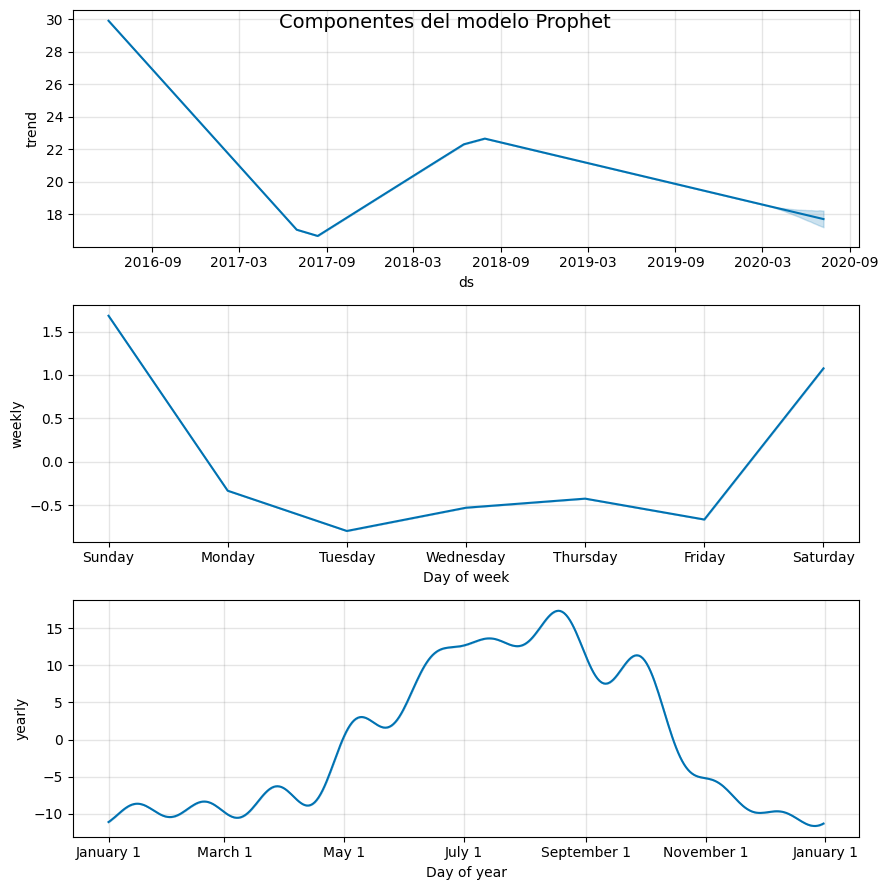

In [23]:
# 3. Gráficos de las predicciones y componentes del modelo Prophet

# Combinar predicciones con valores reales para graficar
forecast_plot = forecast.merge(
    pd.concat([train_prophet, test_prophet]), on='ds', how='left'
)

# Gráfico con etiquetas
fig = go.Figure()

# Línea azul: consumo real
fig.add_trace(go.Scatter(
    x=forecast_plot['ds'],
    y=forecast_plot['y'],
    mode='lines',
    name='Consumo real (y)',
    line=dict(color='blue', width=1.5)
))

# Línea verde discontinua: predicción
fig.add_trace(go.Scatter(
    x=forecast_plot['ds'],
    y=forecast_plot['yhat'],
    mode='lines',
    name='Predicción Prophet (ŷ)',
    line=dict(color='green', dash='dash', width=2)
))

# Intervalo de confianza superior
fig.add_trace(go.Scatter(
    x=forecast_plot['ds'],
    y=forecast_plot['yhat_upper'],
    mode='lines',
    name='Límite superior (IC 95%)',
    line=dict(color='lightgreen', dash='dot')
))

# Intervalo de confianza inferior
fig.add_trace(go.Scatter(
    x=forecast_plot['ds'],
    y=forecast_plot['yhat_lower'],
    mode='lines',
    name='Límite inferior (IC 95%)',
    line=dict(color='lightgreen', dash='dot'),
    fill='tonexty',
    fillcolor='rgba(0, 255, 0, 0.1)'
))

# Personalización del gráfico
fig.update_layout(
    title='Predicciones del modelo Prophet',
    xaxis_title='Fecha',
    yaxis_title='Consumo de energía (kWh)',
    template='plotly_white',
    legend=dict(x=0.02, y=0.98)
)

fig.show()

# Gráfico de las componentes del modelo Prophet
fig_components = model_prophet.plot_components(forecast)
fig_components.suptitle('Componentes del modelo Prophet', fontsize=14)

In [24]:
# 4. Cálculo del MAE en entrenamiento y prueba
# Combinar las predicciones con los datos reales
forecast_full = forecast.merge(pd.concat([train_prophet, test_prophet]), on='ds', how='left')

# Separar nuevamente train y test
forecast_train = forecast_full[forecast_full['ds'] <= train_prophet['ds'].max()]
forecast_test = forecast_full[forecast_full['ds'] > train_prophet['ds'].max()]

# Calcular MAE
mae_train_prophet = mean_absolute_error(forecast_train['y'], forecast_train['yhat'])
mae_test_prophet = mean_absolute_error(forecast_test['y'], forecast_test['yhat'])

print(f"Mean Absolute Error (Entrenamiento): {mae_train_prophet:.2f}")
print(f"Mean Absolute Error (Prueba): {mae_test_prophet:.2f}")

Mean Absolute Error (Entrenamiento): 4.82
Mean Absolute Error (Prueba): 4.92


In [25]:
# 5. Gráfico del error (Valor real - Valor predicho) en todo el intervalo
# Calcular el error
forecast_full['error'] = forecast_full['y'] - forecast_full['yhat']

# Crear figura
fig = go.Figure()

# Línea del error
fig.add_trace(go.Scatter(
    x=forecast_full['ds'],
    y=forecast_full['error'],
    mode='lines',
    name='Error (Valor real - Valor predicho)',
    line=dict(color='royalblue', width=1.5)
))

# Línea base en 0
fig.add_trace(go.Scatter(
    x=[forecast_full['ds'].min(), forecast_full['ds'].max()],
    y=[0, 0],
    mode='lines',
    name='Línea base (error = 0)',
    line=dict(color='red', dash='dash')
))

# Configuración del gráfico
fig.update_layout(
    title='Error del modelo Prophet en todo el intervalo de tiempo',
    xaxis_title='Fecha',
    yaxis_title='Error (kWh)',
    template='plotly_white',
    legend=dict(x=0.02, y=0.98, bgcolor='rgba(255,255,255,0.6)')
)

fig.show()

El gráfico del error sugiere que ya no existe un comportamiento estacional marcado en la serie.

A diferencia de los modelos anteriores (lineal y estacional con Fourier), los residuos del modelo Prophet ahora se distribuyen de manera más aleatoria alrededor de la línea base (error = 0).

Esto indica que Prophet logró capturar adecuadamente la estacionalidad y la tendencia del consumo energético de Homero.

En el gráfico, los peaks positivos y negativos ocurren de forma irregular y sin repetirse en patrones anuales o periódicos, lo cual es característico de una serie en la que las principales fuentes de variación sistemática (tendencia y estacionalidad) ya fueron modeladas.

## 1.4 Incluyendo Regresores [5 puntos]

<center>
<img src ="https://i.redd.it/64hwjftunjjd1.gif" width = 400 />

Con los nuevos resultados obtenidos del modelo Prophet, usted le aconseja a Homero que puede mejorar sus predicciones al incluir regresores en el modelo, es decir, variables adicionales que pueden influir en la variable objetivo, en este caso, el consumo energético. Homero encuentra que es una buena idea y va en busca de ayuda donde el Profesor Frink, un destacado Científico de Springfield. Para suerte de Homero, Frink tenía un estudio reciente que registra las condiciones climáticas en Springfield, en el mismo intervalo de tiempo en que Homero disponía de los datos de consumo eléctrico. Con esta nueva información, usted le recomienda a Homero que podrían utilizar esta información meteorológica proporcionada como variables exógenas al modelo.

Sin embargo, al no comprender bien la importancia de los regresores, Homero decide confiar en sus capacidades y le pide que, por favor, incluya estas variables en el modelo para evaluar su impacto en las predicciones.

Para ello, usted debe:
0. Seleccionar las variables exógenas a utilizar del archivo `datos_frink.csv`. Añada estas variables a sus conjuntos de entrenamiento y prueba mediante `merge`. [0 puntos]
1. Cree el modelo Prophet e incluya los regresores (variables exógenas) al modelo. Luego realice el entrenamiento. **Hint**: Utilice el método `.add_regressor()`. Mas información en el siguiente [Enlace](https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html#additional-regressors). [2 puntos]
2. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
3. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y de prueba. Analice sus resultados. [1 punto]
4. Grafique el error (Valor real - Valor predicho) en el conjunto de entrenamiento y de prueba. ¿Hay un comportamiento estacional en la serie? ¿Influyen estas variables en el comportamiento del consumo energético en el hogar de Homero? [1 punto]

Los datos del dataset de Frink son los siguientes:

* **date**: Fecha de medición.
* **Temp_max**: Temperatura máxima registrada durante el día (en °F).
* **Temp_avg**: Temperatura promedio registrada durante el día (en °F).
* **Temp_min**: Temperatura mínima registrada durante el día (en °F).
* **Dew_max**: Punto de rocío máximo registrado durante el día (en °F).
* **Dew_avg**: Punto de rocío promedio registrado durante el día (en °F).
* **Dew_min**: Punto de rocío mínimo registrado durante el día (en °F).
* **Hum_max**: Humedad máxima registrada durante el día (en porcentaje).
* **Hum_avg**: Humedad promedio registrada durante el día (en porcentaje).
* **Hum_min**: Humedad mínima registrada durante el día (en porcentaje).
* **Wind_max**: Velocidad máxima del viento registrada durante el día (en millas por hora, mph).
* **Wind_avg**: Velocidad promedio del viento registrada durante el día (en millas por hora, mph).
* **Wind_min**: Velocidad mínima del viento registrada durante el día (en millas por hora, mph).
* **Press_max**: Presión atmosférica máxima registrada durante el día (en pulgadas de mercurio, Hg).
* **Press_avg**: Presión atmosférica promedio registrada durante el día (en pulgadas de mercurio, Hg).
* **Press_min**: Presión atmosférica mínima registrada durante el día (en pulgadas de mercurio, Hg).

**Respuesta:**

In [26]:
# 0. Cargar y unir variables exógenas (datos de Frink)

# Cargar el dataset con las condiciones climáticas
path_frink = '/content/drive/MyDrive/MDS7202/datos_frink.csv'
df_frink = pd.read_csv(path_frink)

# Convertir la fecha a datetime
df_frink['date'] = pd.to_datetime(df_frink['date'])

# Visualizar las primeras columnas
df_frink.head()

# Seleccionar las variables exógenas a utilizar
variables_exogenas = ['Temp_avg', 'Hum_avg', 'Wind_avg', 'Press_avg']

# Hacer merge con los conjuntos de entrenamiento y prueba
train_exog = train_prophet.merge(df_frink[['date'] + variables_exogenas],
                                 left_on='ds', right_on='date', how='left').drop(columns='date')

test_exog = test_prophet.merge(df_frink[['date'] + variables_exogenas],
                               left_on='ds', right_on='date', how='left').drop(columns='date')

print(f"Columnas del conjunto de entrenamiento: {train_exog.columns.tolist()}")
train_exog.head()

Columnas del conjunto de entrenamiento: ['ds', 'y', 't', 'trend_pred', 'seasonal_pred', 'Temp_avg', 'Hum_avg', 'Wind_avg', 'Press_avg']


,ds,y,t,trend_pred,seasonal_pred,Temp_avg,Hum_avg,Wind_avg,Press_avg
0,2016-06-01,29.691,0,26.120946,27.969107,74.8,89.4,9.5,29.8
1,2016-06-02,28.789,1,26.114075,28.283351,71.2,96.8,7.8,29.8
2,2016-06-03,19.247,2,26.107204,28.594088,72.1,93.6,4.7,29.8
3,2016-06-04,22.883,3,26.100333,28.901027,71.2,96.1,7.0,29.7
4,2016-06-05,25.195,4,26.093462,29.203885,73.8,88.7,7.7,29.7


In [27]:
# 1. Crear y entrenar modelo Prophet con regresores
# Crear el modelo Prophet con estacionalidades
model_prophet_reg = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False
)

# Añadir las variables exógenas como regresores
for reg in variables_exogenas:
    model_prophet_reg.add_regressor(reg)

# Entrenar el modelo
model_prophet_reg.fit(train_exog)

Text(0.5, 0.98, 'Componentes del modelo Prophet con regresores')

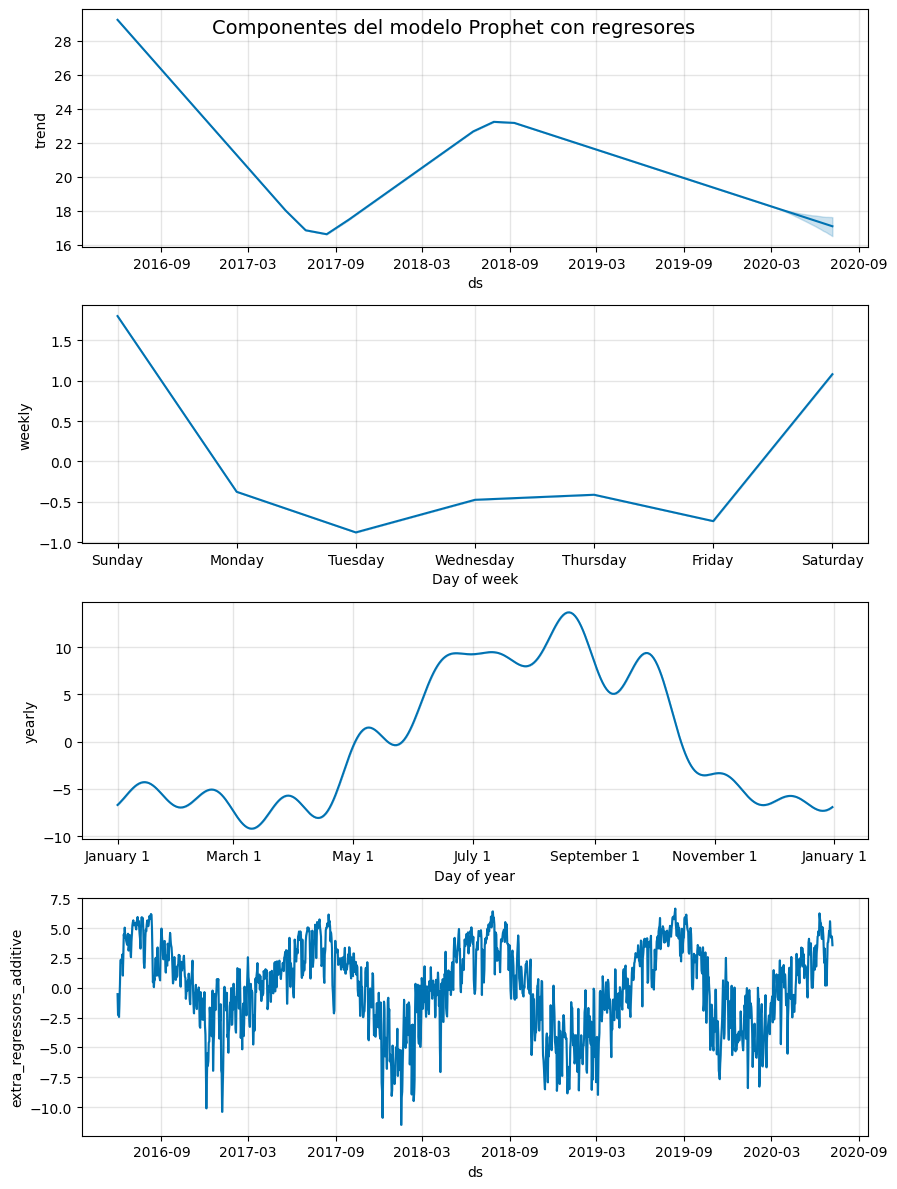

In [28]:
# 2. Predicciones y gráficos del modelo Prophet con regresores

# Preparar dataset de predicciones (entrenamiento + prueba)
future_exog = pd.concat([train_exog, test_exog], axis=0)

# Realizar las predicciones
forecast_reg = model_prophet_reg.predict(future_exog)

# Combinar con datos reales para graficar
forecast_plot = forecast_reg.merge(
    pd.concat([train_exog, test_exog]), on='ds', how='left'
)

# --- Gráfico con etiquetas ---
import plotly.graph_objects as go

fig = go.Figure()

# Línea del consumo real
fig.add_trace(go.Scatter(
    x=forecast_plot['ds'],
    y=forecast_plot['y'],
    mode='lines',
    name='Consumo real (y)',
    line=dict(color='blue', width=1.5)
))

# Línea de la predicción
fig.add_trace(go.Scatter(
    x=forecast_plot['ds'],
    y=forecast_plot['yhat'],
    mode='lines',
    name='Predicción Prophet con regresores (ŷ)',
    line=dict(color='green', dash='dash', width=2)
))

# Intervalo de confianza superior
fig.add_trace(go.Scatter(
    x=forecast_plot['ds'],
    y=forecast_plot['yhat_upper'],
    mode='lines',
    name='Límite superior (IC 95%)',
    line=dict(color='lightgreen', dash='dot')
))

# Intervalo de confianza inferior
fig.add_trace(go.Scatter(
    x=forecast_plot['ds'],
    y=forecast_plot['yhat_lower'],
    mode='lines',
    name='Límite inferior (IC 95%)',
    line=dict(color='lightgreen', dash='dot'),
    fill='tonexty',
    fillcolor='rgba(0, 255, 0, 0.1)'
))

# Personalizar gráfico
fig.update_layout(
    title='Predicciones del modelo Prophet con regresores',
    xaxis_title='Fecha',
    yaxis_title='Consumo de energía (kWh)',
    template='plotly_white',
    legend=dict(x=0.02, y=0.98, bgcolor='rgba(255,255,255,0.6)')
)

fig.show()

# --- Gráfico de componentes estándar de Prophet ---
fig_components = model_prophet_reg.plot_components(forecast_reg)
fig_components.suptitle('Componentes del modelo Prophet con regresores', fontsize=14)


In [29]:
# 3. Cálculo del MAE del modelo con regresores
# Combinar las predicciones con los datos reales
forecast_reg_full = forecast_reg.merge(pd.concat([train_exog, test_exog]), on='ds', how='left')

# Separar nuevamente train y test
forecast_reg_train = forecast_reg_full[forecast_reg_full['ds'] <= train_exog['ds'].max()]
forecast_reg_test = forecast_reg_full[forecast_reg_full['ds'] > train_exog['ds'].max()]

# Calcular MAE
mae_train_reg = mean_absolute_error(forecast_reg_train['y'], forecast_reg_train['yhat'])
mae_test_reg = mean_absolute_error(forecast_reg_test['y'], forecast_reg_test['yhat'])

print(f"MAE (Entrenamiento - con regresores): {mae_train_reg:.2f}")
print(f"MAE (Prueba - con regresores): {mae_test_reg:.2f}")

MAE (Entrenamiento - con regresores): 4.74
MAE (Prueba - con regresores): 4.56


In [30]:
# 4. Grafico del error (Valor real - Valor predicho)
# Calcular el error
forecast_reg_full['error'] = forecast_reg_full['y'] - forecast_reg_full['yhat']

# Crear figura
fig = go.Figure()

# Linea del error
fig.add_trace(go.Scatter(
    x=forecast_reg_full['ds'],
    y=forecast_reg_full['error'],
    mode='lines',
    name='Error (Valor real - Valor predicho)',
    line=dict(color='royalblue', width=1.5)
))

# Linea base en 0
fig.add_trace(go.Scatter(
    x=[forecast_reg_full['ds'].min(), forecast_reg_full['ds'].max()],
    y=[0, 0],
    mode='lines',
    name='Línea base (error = 0)',
    line=dict(color='red', dash='dash')
))

# Configuracion del grafico
fig.update_layout(
    title='Error del modelo Prophet con regresores',
    xaxis_title='Fecha',
    yaxis_title='Error (kWh)',
    template='plotly_white',
    legend=dict(x=0.02, y=0.98, bgcolor='rgba(255,255,255,0.6)')
)

fig.show()

Al comparar el error del modelo Prophet sin regresores con el del modelo Prophet con regresores, se observa que ambos gráficos son prácticamente idénticos.

Las oscilaciones, la amplitud de los errores y la distribución alrededor de la línea base (error = 0) son equivalentes, lo que indica que no hubo mejora significativa en el desempeño del modelo tras incorporar las variables meteorológicas.

Con esto en mente, podemos decir que no se aprecia un comportamiento estacional residual en la serie: Prophet ya había capturado adecuadamente la tendencia y la estacionalidad antes de incluir los regresores.

En conclusion,  las variables climáticas no influyen de forma relevante en el consumo energético de Homero dentro de este período y resolución temporal (diaria). Esto sugiere que el consumo de energía del hogar de Homero depende más de patrones estacionales generales (invierno/verano) ya modelados por Prophet, y no tanto de las variaciones diarias de temperatura, humedad o viento.

## 1.5 Aplicando Lags [7 puntos]

<center>
<img src ="https://i.gifer.com/J45h.gif" width = 400 />

Homero, satisfecho con los resultados obtenidos, cree que aún puede mejorar el rendimiento del modelo incorporando lags de las variables exógenas. Se le ocurre que, al incluir estos lags, podría identificar cómo los valores pasados de las variables influyen en la evolución de la variable objetivo. Con esta idea en mente, Homero solicita su ayuda para encontrar y aplicar los lags adecuados a las variables exógenas de manera efectiva.

Para ello, a usted se le pide que:

1. Calcule la `Autocorrelación Parcial` de las variables exógenas `avg` que usted haya considerado. Por ejemplo: `Temp_avg, Dew_avg, etc`. Luego determine la cantidad de rezagos (lags) que se va a aplicar a cada una de las variables. Justifique. [1 punto]

2. Aplique los lags determinados en el paso anterior e incluyalos como variables en los conjuntos train y test. [1 punto]

3. Impute los valores nulos de los nuevos atributos lags mediante la media de cada variable. [1 punto]

4. Cree y entrene el modelo Prophet e incluya las variables exógenas y adicionalmente sus respectivos lags al modelo. [1 punto]

5. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
6. Calcule el `MAE` de la predicción en el conjunto de prueba y en el de entrenamiento. Analice sus resultados. [1 punto]
7. Grafique el error (Valor real - Valor predicho) en el conjunto de entrenamiento y en el de prueba. ¿Hay un comportamiento estacional en la serie? ¿Como afecta la inclusión de los lags en el desempeño del modelo? [1 punto]


**Respuesta:**

In [31]:
# 1. PACF para elegir lags de variables exógenas *_avg

from statsmodels.tsa.stattools import pacf

# Serie completa alineada por fecha para calcular PACF
meteo = df_frink.sort_values('date').set_index('date')

variables_avg = [v for v in meteo.columns if v.endswith('_avg')]

max_lag = 30  # ventana diaria (~1 mes)
N = len(meteo)
z = 1.96
threshold = z / np.sqrt(N)  # umbral de significancia aproximado

selected_lags = {}

for var in variables_avg:
    pacf_vals = pacf(meteo[var].interpolate(), nlags=max_lag, method='ywm')
    lags_sig = [lag for lag in range(1, max_lag + 1) if abs(pacf_vals[lag]) > threshold]
    lags_sig = lags_sig[:5]
    selected_lags[var] = lags_sig

print("Lags seleccionados por variable (|PACF| > {:.3f}):".format(threshold))
for var, lags in selected_lags.items():
    print(f"  {var}: {lags if lags else '— (sin lags significativos)'}")

Lags seleccionados por variable (|PACF| > 0.051):
  Temp_avg: [1, 2, 3, 4, 5]
  Dew_avg: [1, 2, 3, 4, 5]
  Hum_avg: [1, 2, 3, 18, 19]
  Wind_avg: [1, 3, 8, 11, 16]
  Press_avg: [1, 2, 3, 4, 5]


Para determinar la cantidad de lags a aplicar a las variables exógenas, se calculó la Autocorrelación Parcial de cada una de las variables promedio del conjunto meteorológico, considerando un máximo de 30 rezagos diarios (aproximadamente un mes).

El análisis de la PACF permite identificar la dependencia directa entre los valores actuales de una variable y sus valores pasados, controlando por los efectos de los rezagos intermedios. De esta manera, los peaks significativos en la PACF indican la existencia de una relación relevante en esos rezagos específicos.

Se seleccionaron como rezagos aquellos lags cuyo valor absoluto de la PACF fue mayor al umbral de significancia estadística aproximado por $( \pm \frac{1.96}{\sqrt{N}} )$, donde ( N ) corresponde al número de observaciones de la serie. Este criterio representa un intervalo de confianza del 95%, por lo que solo se incluyen los rezagos con evidencia suficiente de autocorrelación parcial.

Finalmente, se limitaron los rezagos seleccionados a los primeros valores significativos, con el objetivo de evitar el sobreajuste y la multicolinealidad entre variables altamente correlacionadas. Esto permite mantener un modelo parsimonioso y con mejor capacidad de generalización.

In [32]:
# 2. Construir columnas lag y hacer merge a train/test

# Crear el dataframe
df_all_features = df_frink.copy()

for var_base, lags_list in selected_lags.items():
    for L in lags_list:
        new_lag_col_name = f"{var_base}_lag{L}"
        df_all_features[new_lag_col_name] = df_all_features[var_base].shift(L)

global regressors_all
regressors_all = variables_exogenas.copy()

# Agregar lags para `variables_exogenas`
for var_base in variables_exogenas:
    if var_base in selected_lags:
        for L in selected_lags[var_base]:
            lag_name = f"{var_base}_lag{L}"
            if lag_name in df_all_features.columns:
                regressors_all.append(lag_name)

# Filtrar df_all_featurespara incluir 'date' y `regressors_all`
df_features_for_merge = df_all_features[['date'] + regressors_all]

train_exog_lags = train_prophet.merge(
    df_features_for_merge,
    left_on='ds', right_on='date', how='left'
).drop(columns=['date'])

test_exog_lags = test_prophet.merge(
    df_features_for_merge,
    left_on='ds', right_on='date', how='left'
).drop(columns=['date'])

print(f"Columnas en train_exog_lags: {train_exog_lags.columns.tolist()}")
print(f"Regresores totales para Prophet: {regressors_all}")

Columnas en train_exog_lags: ['ds', 'y', 't', 'trend_pred', 'seasonal_pred', 'Temp_avg', 'Hum_avg', 'Wind_avg', 'Press_avg', 'Temp_avg_lag1', 'Temp_avg_lag2', 'Temp_avg_lag3', 'Temp_avg_lag4', 'Temp_avg_lag5', 'Hum_avg_lag1', 'Hum_avg_lag2', 'Hum_avg_lag3', 'Hum_avg_lag18', 'Hum_avg_lag19', 'Wind_avg_lag1', 'Wind_avg_lag3', 'Wind_avg_lag8', 'Wind_avg_lag11', 'Wind_avg_lag16', 'Press_avg_lag1', 'Press_avg_lag2', 'Press_avg_lag3', 'Press_avg_lag4', 'Press_avg_lag5']
Regresores totales para Prophet: ['Temp_avg', 'Hum_avg', 'Wind_avg', 'Press_avg', 'Temp_avg_lag1', 'Temp_avg_lag2', 'Temp_avg_lag3', 'Temp_avg_lag4', 'Temp_avg_lag5', 'Hum_avg_lag1', 'Hum_avg_lag2', 'Hum_avg_lag3', 'Hum_avg_lag18', 'Hum_avg_lag19', 'Wind_avg_lag1', 'Wind_avg_lag3', 'Wind_avg_lag8', 'Wind_avg_lag11', 'Wind_avg_lag16', 'Press_avg_lag1', 'Press_avg_lag2', 'Press_avg_lag3', 'Press_avg_lag4', 'Press_avg_lag5']


In [33]:
# 3. Imputación de nulos en lags usando la media calculada en TRAIN
lag_cols_for_imputation = [col for col in regressors_all if '_lag' in col]

# Medias en TRAIN
lag_means = train_exog_lags[lag_cols_for_imputation].mean()

# Imputar en ambos sets con las medias de TRAIN
train_exog_lags[lag_cols_for_imputation] = train_exog_lags[lag_cols_for_imputation].fillna(lag_means)
test_exog_lags[lag_cols_for_imputation] = test_exog_lags[lag_cols_for_imputation].fillna(lag_means)

print("Imputación completada. Ejemplo de medias usadas:\n", lag_means.head())

Imputación completada. Ejemplo de medias usadas:
 Temp_avg_lag1    70.899196
Temp_avg_lag2    70.911046
Temp_avg_lag3    70.928843
Temp_avg_lag4    70.944322
Temp_avg_lag5    70.952346
dtype: float64


In [34]:
# 4. Prophet con exógenas + lags

model_prophet_lags = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False
)

for reg in regressors_all:
    model_prophet_lags.add_regressor(reg)

# Entrenar
model_prophet_lags.fit(train_exog_lags)

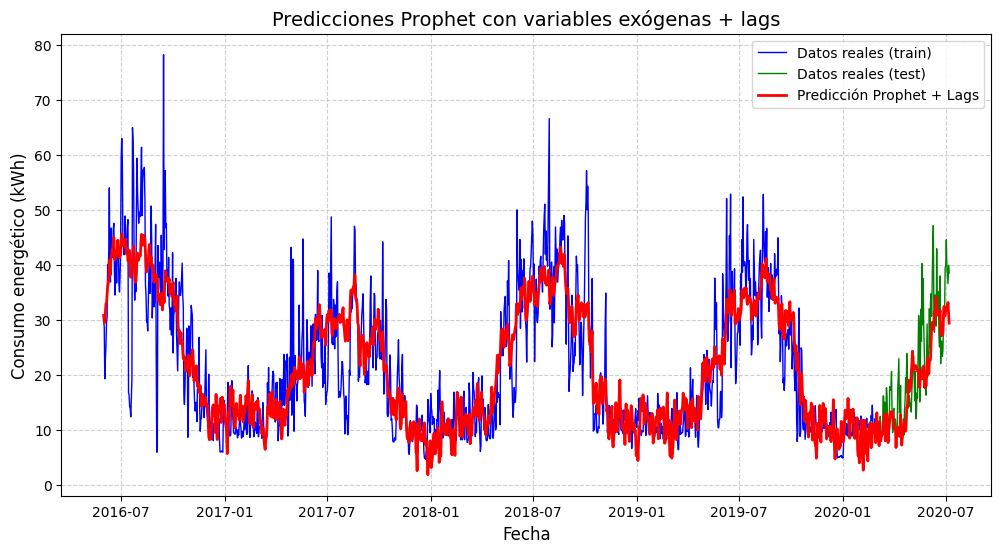

Text(0.5, 0.98, 'Componentes Prophet con exógenas + lags')

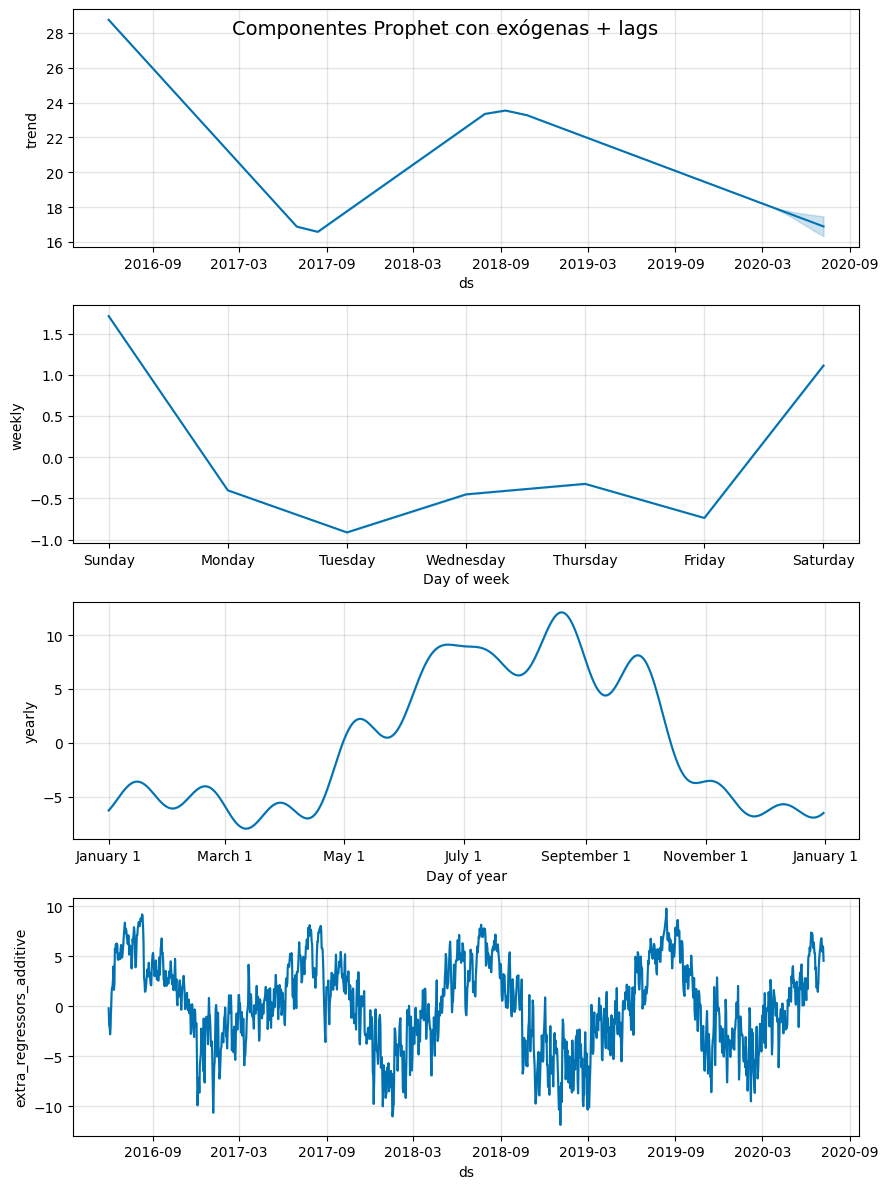

In [35]:
# 5. Predicciones y componentes

# Dataset de predicción (train + test) con todas las columnas
future_lags = pd.concat([train_exog_lags, test_exog_lags], axis=0, ignore_index=True)
forecast_lags = model_prophet_lags.predict(future_lags)

# Gráfico de predicciones
fig1, ax1 = plt.subplots(figsize=(12, 6))

# Curva real
ax1.plot(train_prophet['ds'], train_prophet['y'], label='Datos reales (train)', color='blue', linewidth=1)
ax1.plot(test_prophet['ds'], test_prophet['y'], label='Datos reales (test)', color='green', linewidth=1)

# Curva de predicciones
ax1.plot(forecast_lags['ds'], forecast_lags['yhat'], label='Predicción Prophet + Lags', color='red', linewidth=2)

# Etiquetas y leyenda
ax1.set_title('Predicciones Prophet con variables exógenas + lags', fontsize=14)
ax1.set_xlabel('Fecha', fontsize=12)
ax1.set_ylabel('Consumo energético (kWh)', fontsize=12)
ax1.legend(loc='upper right')
ax1.grid(True, linestyle='--', alpha=0.6)
plt.show()

fig2 = model_prophet_lags.plot_components(forecast_lags)
fig2.suptitle('Componentes Prophet con exógenas + lags', fontsize=14)

In [36]:
# 6. MAE en entrenamiento y prueba
# Unimos predicciones con valores reales
y_full = pd.concat([train_prophet[['ds','y']], test_prophet[['ds','y']]], axis=0, ignore_index=True)
forecast_full_lags = forecast_lags[['ds','yhat']].merge(y_full, on='ds', how='left')

# Cortes
ds_cut = train_prophet['ds'].max()
mask_train = forecast_full_lags['ds'] <= ds_cut
mask_test  = forecast_full_lags['ds'] >  ds_cut

mae_train_lags = mean_absolute_error(forecast_full_lags.loc[mask_train, 'y'],
                                     forecast_full_lags.loc[mask_train, 'yhat'])
mae_test_lags  = mean_absolute_error(forecast_full_lags.loc[mask_test,  'y'],
                                     forecast_full_lags.loc[mask_test,  'yhat'])

print(f"MAE (Entrenamiento, con lags): {mae_train_lags:.2f}")
print(f"MAE (Prueba, con lags):       {mae_test_lags:.2f}")

MAE (Entrenamiento, con lags): 4.69
MAE (Prueba, con lags):       4.51


La incorporación de regresores y posteriormente de sus lags reduce el MAE en ambos conjuntos. Aunque la disminución es pequeña, esto indica que los modelos están capturando información adicional relevante.

La inclusión de los rezagos de las variables meteorológicas permitió al modelo considerar los efectos retardados del clima sobre el consumo eléctrico. Esto tiene sentido, ya que el uso de calefacción o aire acondicionado puede responder no solo a las condiciones del día actual, sino también a la tendencia térmica de los días anteriores.


In [37]:
# 7. Gráfico del error (train y test) con labels claros

forecast_full_lags['error'] = forecast_full_lags['y'] - forecast_full_lags['yhat']

fig = go.Figure()

# Error train
fig.add_trace(go.Scatter(
    x=forecast_full_lags.loc[mask_train, 'ds'],
    y=forecast_full_lags.loc[mask_train, 'error'],
    mode='lines',
    name='Error (Train)',
    line=dict(width=1.5)
))

# Error test
fig.add_trace(go.Scatter(
    x=forecast_full_lags.loc[mask_test, 'ds'],
    y=forecast_full_lags.loc[mask_test, 'error'],
    mode='lines',
    name='Error (Test)',
    line=dict(dash='dash', width=1.5)
))

# Línea base
fig.add_trace(go.Scatter(
    x=[forecast_full_lags['ds'].min(), forecast_full_lags['ds'].max()],
    y=[0, 0],
    mode='lines',
    name='Línea base (error = 0)',
    line=dict(color='red', dash='dot')
))

fig.update_layout(
    title='Error (real - predicho) — Prophet con exógenas + lags',
    xaxis_title='Fecha',
    yaxis_title='Error (kWh)',
    template='plotly_white',
    legend=dict(x=0.02, y=0.98)
)
fig.show()

Al analizar el gráfico del error del modelo Prophet con regresores y lags, se observa que no existen diferencias visibles respecto a los gráficos obtenidos en los modelos previos.

El error continúa distribuyéndose de forma aleatoria y simétrica alrededor de la línea base (error = 0), sin presentar patrones periódicos o repeticiones temporales evidentes.

Esto indica que no hay un comportamiento estacional remanente en la serie: Prophet ya había capturado adecuadamente la tendencia y la estacionalidad desde etapas anteriores.

## 1.6 Optimizando Prophet [6 puntos]

<center>
<img src ="https://i.gifer.com/BKlg.gif" width = 500 />

Homero, contento con sus resultados, decide compartir su trabajo en LinkedIn. Sin embargo, justo antes de realizar la publicación, su hija Lisa Simpson le comenta que su modelo podría mejorar aún más mediante la optimización de hiperparámetros. Aunque Homero no entiende muy bien a qué se refiere Lisa, decide confiar en su conocimiento y le pide ayuda para implementar la optimización.

Lisa le prepara una función llamada optimize_prophet, que recibe como entrada el registro histórico, los datos a predecir (futuros), el nombre de las variables exógenas y una grilla de hiperparámetros que se desea modificar.

Después de varios intentos, Homero no logra utilizar la función de Lisa y, desesperado por publicar sus resultados en internet, se acerca a usted en busca de ayuda.

Para ello, usted decide realizar los siguientes pasos:

1. Crear una grilla donde se modifiquen los siguientes hiperparámetros: `changepoint_prior_scale`, `seasonality_prior_scale`, `seasonality_mode`, `changepoint_range` y encuentre los hiperparámetros que optimicen el `MAE`. `Nota:` Utilice la función `optimize_prophet()` dada en el enunciado. [1 punto]
2. Crear y entrenar un modelo Prophet utilizando los mejores parámetros encontrados, incluyendo regresores (variables exógenas). [2 puntos]
3. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
4. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y en el de prueba. [1 punto]
5. Grafique el error (Valor real - Valor predicho) en ambos conjuntos. Analice sus resultados. [1 punto]


In [38]:
#NO MODIFICAR ESTA CELDA

import itertools
import numpy as np
import pandas as pd
from tqdm import tqdm
import logging

# Silenciar el logging de Prophet
logging.getLogger('prophet').setLevel(logging.ERROR)
logging.getLogger('cmdstanpy').setLevel(logging.ERROR)


def optimize_prophet(df, df_to_pred, features, param_grid ):
  '''
  Función que recibe como entrada:
  -df: data entrenamiento.
  -df_to_pred: data a predecir (test).
  -features: lista de variables exógenas.
  -param_grid: grilla de hiperparámetros.

  Retorna:
  -tuning_results: Dataframe con resultados de la optimización.
  -best_params: Diccionario de mejores parámetros encontrados.
  '''

  # Generate all combinations of parameters
  all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
  MAEs = []  # Store the MAEs for each params here

  # Use tqdm to add a progress bar to the parameter tuning loop
  for params in tqdm(all_params, desc="Tuning Prophet parameters"):
      m = Prophet(**params)  # Fit model with given params
      for feature in features:
          m.add_regressor(feature)
      m.fit(df)

      # Prepare future dataframe
      df_prop = m.make_future_dataframe(periods=len(df_to_pred))
      df_feat = pd.concat([df[features], df_to_pred[features]]).reset_index(drop=True)
      df_prop[features] = df_feat[features]

      # Make predictions
      forecast = m.predict(df_prop)
      forecast_pred = forecast[forecast['ds'].isin(df_to_pred['ds'])].reset_index(drop=True)

      # Calculate MAE for the predictions
      mae_pred = mean_absolute_error(df_to_pred['y'], forecast_pred['yhat'])
      MAEs.append(mae_pred)

  # Find the best parameters
  tuning_results = pd.DataFrame(all_params)
  tuning_results['MAEs'] = MAEs
  tuning_results = tuning_results.sort_values(by='MAEs', ascending=True)
  best_params = all_params[np.argmin(MAEs)]
  return tuning_results, best_params

**Respuesta:**

In [39]:
# 1. Crear grilla de hiperparámetros y optimizar el MAE

# Definir la grilla de hiperparámetros para optimizar
param_grid = {
    'changepoint_prior_scale': [0.01, 0.1, 0.5, 1.0],
    'seasonality_prior_scale': [0.01, 0.1, 0.5, 1.0],
    'seasonality_mode': ['additive', 'multiplicative'],
    'changepoint_range': [0.8, 0.9, 0.95]
}

# Llamar a la función de optimización
tuning_results, best_params = optimize_prophet(train_exog_lags, test_exog_lags, variables_exogenas, param_grid)

# Mostrar los mejores resultados
print(f"Mejor combinación de hiperparámetros: {best_params}")
print(f"Resultados de la optimización:\n", tuning_results.head())

Tuning Prophet parameters: 100%|██████████| 96/96 [01:39<00:00,  1.03s/it]

Mejor combinación de hiperparámetros: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'changepoint_range': 0.9}
Resultados de la optimización:
     changepoint_prior_scale  seasonality_prior_scale seasonality_mode  \
10                     0.01                      0.1   multiplicative   
23                     0.01                      1.0   multiplicative   
17                     0.01                      0.5   multiplicative   
21                     0.01                      1.0   multiplicative   
9                      0.01                      0.1   multiplicative   

    changepoint_range      MAEs  
10               0.90  4.060567  
23               0.95  4.061202  
17               0.95  4.061628  
21               0.80  4.064569  
9                0.80  4.070435  


In [40]:
# 2. Crear y entrenar el modelo Prophet con los mejores parámetros encontrados
# Crear el modelo Prophet con los mejores parámetros
best_model_prophet = Prophet(
    changepoint_prior_scale=best_params['changepoint_prior_scale'],
    seasonality_prior_scale=best_params['seasonality_prior_scale'],
    seasonality_mode=best_params['seasonality_mode'],
    changepoint_range=best_params['changepoint_range']
)

# Añadir regresores (variables exógenas) al modelo
for feature in variables_exogenas:
    best_model_prophet.add_regressor(feature)

# Entrenar el modelo con el conjunto de entrenamiento
best_model_prophet.fit(train_exog_lags)

Text(0.5, 0.98, 'Componentes Prophet optimizado con regresores y lags')

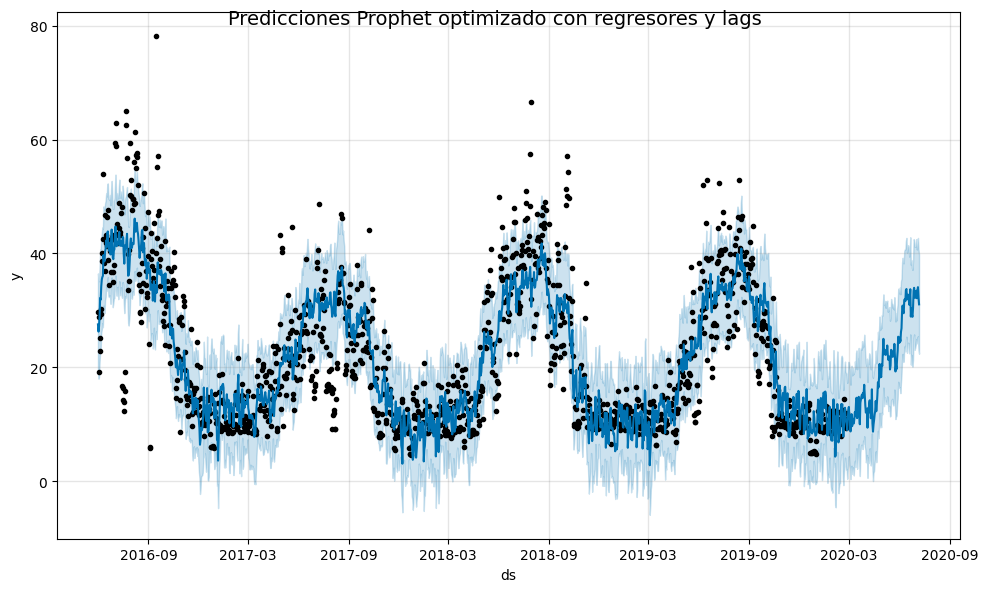

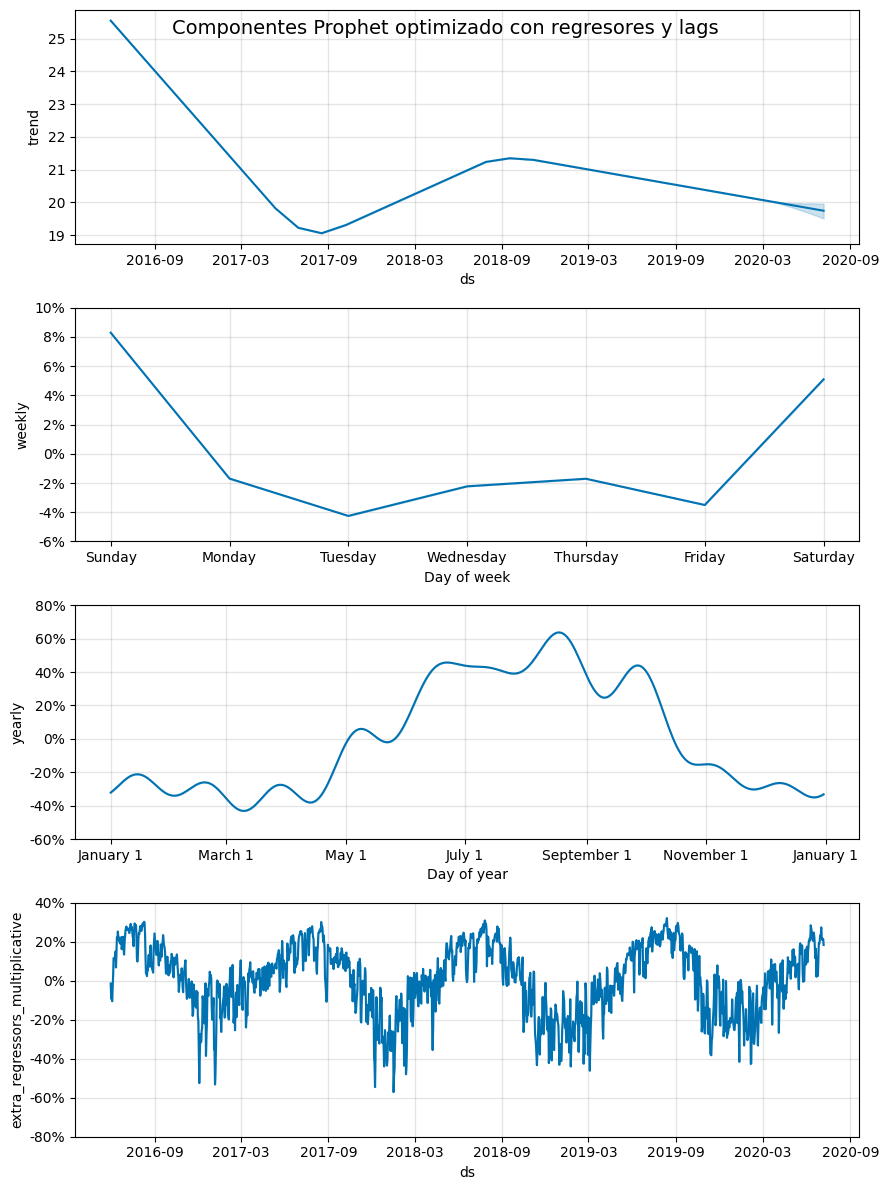

In [41]:
# 3. Graficar las predicciones y componentes del modelo Prophet

# Preparar el dataframe para la predicción (train + test)
future_lags = pd.concat([train_exog_lags, test_exog_lags], axis=0)

# Realizar las predicciones
forecast_lags = best_model_prophet.predict(future_lags)

# Gráfico de las predicciones
fig1 = best_model_prophet.plot(forecast_lags)
fig1.suptitle('Predicciones Prophet optimizado con regresores y lags', fontsize=14)

# Gráfico de las componentes (tendencia, estacionalidad, etc.)
fig2 = best_model_prophet.plot_components(forecast_lags)
fig2.suptitle('Componentes Prophet optimizado con regresores y lags', fontsize=14)

In [42]:
# 4. Calcular MAE en entrenamiento y prueba

# Unir las predicciones con los valores reales
y_full = pd.concat([train_prophet[['ds', 'y']], test_prophet[['ds', 'y']]], axis=0)
forecast_full_lags = forecast_lags[['ds', 'yhat']].merge(y_full, on='ds', how='left')

# Cortes para entrenamiento y prueba
ds_cut = train_prophet['ds'].max()
mask_train = forecast_full_lags['ds'] <= ds_cut
mask_test = forecast_full_lags['ds'] > ds_cut

# Calcular MAE
mae_train = mean_absolute_error(forecast_full_lags.loc[mask_train, 'y'], forecast_full_lags.loc[mask_train, 'yhat'])
mae_test = mean_absolute_error(forecast_full_lags.loc[mask_test, 'y'], forecast_full_lags.loc[mask_test, 'yhat'])

print(f"MAE (Entrenamiento, optimizado): {mae_train:.2f}")
print(f"MAE (Prueba, optimizado): {mae_test:.2f}")

MAE (Entrenamiento, optimizado): 4.84
MAE (Prueba, optimizado): 4.06


In [43]:
# 5. Graficar el error (Valor real - Valor predicho) en ambos conjuntos

# Calcular el error
forecast_full_lags['error'] = forecast_full_lags['y'] - forecast_full_lags['yhat']

# Crear figura para el error
fig = go.Figure()

# Error en entrenamiento
fig.add_trace(go.Scatter(
    x=forecast_full_lags.loc[mask_train, 'ds'],
    y=forecast_full_lags.loc[mask_train, 'error'],
    mode='lines',
    name='Error (Entrenamiento)',
    line=dict(width=1.5)
))

# Error en prueba
fig.add_trace(go.Scatter(
    x=forecast_full_lags.loc[mask_test, 'ds'],
    y=forecast_full_lags.loc[mask_test, 'error'],
    mode='lines',
    name='Error (Prueba)',
    line=dict(dash='dash', width=1.5)
))

# Línea base en 0
fig.add_trace(go.Scatter(
    x=[forecast_full_lags['ds'].min(), forecast_full_lags['ds'].max()],
    y=[0, 0],
    mode='lines',
    name='Línea base (error = 0)',
    line=dict(color='red', dash='dot')
))

fig.update_layout(
    title='Error del modelo Prophet optimizado',
    xaxis_title='Fecha',
    yaxis_title='Error (kWh)',
    template='plotly_white',
    legend=dict(x=0.02, y=0.98)
)

fig.show()

#### **Comparativa de los MAE:**

* **Entrenamiento:** El MAE del modelo optimizado (4.84) es ligeramente peor que el modelo sin optimizar (4.74). Esta diferencia es pequeña, lo que indica que la optimización de los hiperparámetros no proporcionó una mejora significativa en el ajuste del modelo para los datos de entrenamiento. Este pequeño aumento podría deberse a la complejidad añadida por los nuevos parámetros.

* **Prueba:** En el conjunto de prueba, el MAE optimizado (4.06) es mejor*que el MAE sin optimizar (4.56). Esto sugiere que la optimización ha mejorado la capacidad de generalización del modelo, ya que el modelo optimizado tiene un error más bajo en datos no vistos (prueba). La mejora en el MAE en prueba es pequeña, pero significativa.

#### **Gráfico de Error:**

* El gráfico de errores del modelo optimizado (a simple vista) es casi idéntico a los anteriores, lo que indica que, aunque los hiperparámetros fueron optimizados, el comportamiento general del modelo no ha cambiado sustancialmente en cuanto a la distribución de los errores.
* Esto puede ser una señal de que los lags y los regresores ya capturaban bien la estacionalidad y la tendencia, por lo que la optimización de los parámetros no ha tenido un impacto visual importante en el comportamiento del error.


# **2. Sistemas de Recomendación (30 puntos)**

## Homero contra la Prohibición

<center>
<img src ="https://i.ytimg.com/vi/rMSXXuhZjYY/maxresdefault.jpg" width = 500 />

En Springfield, el caos estalló cuando las autoridades prohibieron el alcohol. Pero como siempre, donde otros ven problemas, Homero Simpson ve oportunidades. Decidido a mantener las fiestas vivas, se convirtió en el Barón de la Cerveza en un abrir y cerrar de ojos. Con la ayuda de su buen amigo Moe el cantinero, Homero obtuvo un valioso dataset llamado `cervezas.csv`, que contiene valoraciones de los ciudadanos de Springfield sobre distintas cervezas. Homero quiere asegurarse de ofrecer las cervezas más apreciadas para mantener a su clientela oculta y feliz, mientras eludía la mirada del estricto Elio Pez. Por ende, Homero lo contacta para solicitar de su ayuda en esta nueva labor.

El dataset contiene los siguientes atributos:

  * userId: Identificador de los ciudadanos/usuarios
  * beerId: Identificador único de cada cerveza
  * rating: Evaluación otorgada por el ciudadano a la cerveza, en un rango de 1.0 a 5.0.
  * beerName: Nombre de la cerveza
  * beerStyle: Tipo de Cerveza.



In [44]:
!pip install surprise

In [45]:
# Librerias extras
from sklearn.preprocessing import LabelEncoder

from surprise import accuracy
from surprise.reader import Reader
from surprise.dataset import Dataset
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.prediction_algorithms.matrix_factorization import SVD
from surprise.accuracy import mae
from surprise import NMF
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import pandas as pd
from copy import deepcopy

## Carga de los datos [0 puntos]

Cargue el dataset `cervezas.csv` y realice una breve exploración de los datos. ¿Hay valores nulos? ¿Cuantos cervezas se estan evaluando? ¿Cuantos ciudadanos participaron de esta evaluación?

In [46]:
# Cargar el dataset
cervezas_path = path = '/content/drive/MyDrive/MDS7202/cervezas.csv'
df_cervezas = pd.read_csv(cervezas_path, delimiter=',', encoding='utf-8')
df_cervezas

,userId,beerId,rating,beerName,beerStyle
0,144,995,3.0,Mai Bock,Maibock / Helles Bock
1,63,58695,4.0,Hop In The Dark Cascadian Dark Ale,American Black Ale
2,147,4083,5.0,Stone Ruination IPA,American Double / Imperial IPA
3,4261,40310,3.0,Noël Des Géants,Herbed / Spiced Beer
4,140,1904,5.0,Sierra Nevada Celebration Ale,American IPA
...,...,...,...,...,...
295054,863,45653,4.0,Consecration,American Wild Ale
295055,306,1341,4.0,Keystone Light,Light Lager
295056,8,8917,3.0,Drop Top Amber,American Amber / Red Ale
295057,35,102,3.0,Samuel Adams Octoberfest,Märzen / Oktoberfest


In [47]:
# Comprobar valores nulos
print("\nValores nulos en cada columna:")
print(df_cervezas.isnull().sum())

# Graficar la cantidad de cervezas evaluadas (valores únicos de beerId)
num_cervezas = df_cervezas['beerId'].nunique()
print(f"\nNúmero de cervezas evaluadas: {num_cervezas}")

# Graficar la cantidad de ciudadanos que participaron (valores únicos de userId)
num_ciudadanos = df_cervezas['userId'].nunique()
print(f"\nCantidad de ciudadanos que participaron en la evaluación: {num_ciudadanos}")


Valores nulos en cada columna:
userId       0
beerId       0
rating       0
beerName     0
beerStyle    0
dtype: int64

Número de cervezas evaluadas: 3747

Cantidad de ciudadanos que participaron en la evaluación: 706


## 2.1 Caracterización Inicial [3 puntos]

Antes de entrenar nuestro sistema recomendador, es necesario caracterizar los datos disponibles y de esta manera tener un mejor entendimiento del problema a resolver. Para esto, se le pide lo siguiente:

1. Genere gráficos y/o estadística descriptiva con los datos. Utilice su análisis para responder las siguientes preguntas: [2 puntos]
  - ¿Cuantos *usuarios* hay en los datos?
  - ¿Cuantos *productos* hay en los datos?
  - ¿Cuantas *calificaciones* hay en los datos?
  - ¿Cuantas *calificaciones* faltantes hay en los datos?
  - ¿Cual es la media de las *calificaciones* entregadas por los usuarios? ¿Cómo cambia esto a través de los productos?  
2. Transforme los datos entregados a una matriz (usuario, producto) y muestre sus resultados. [1 punto]

Cantidad de usuarios: 706
Cantidad de productos: 3747
Cantidad de calificaciones: 295059
Cantidad de calificaciones faltantes: 0
Media de las calificaciones entregadas por los usuarios: 3.86


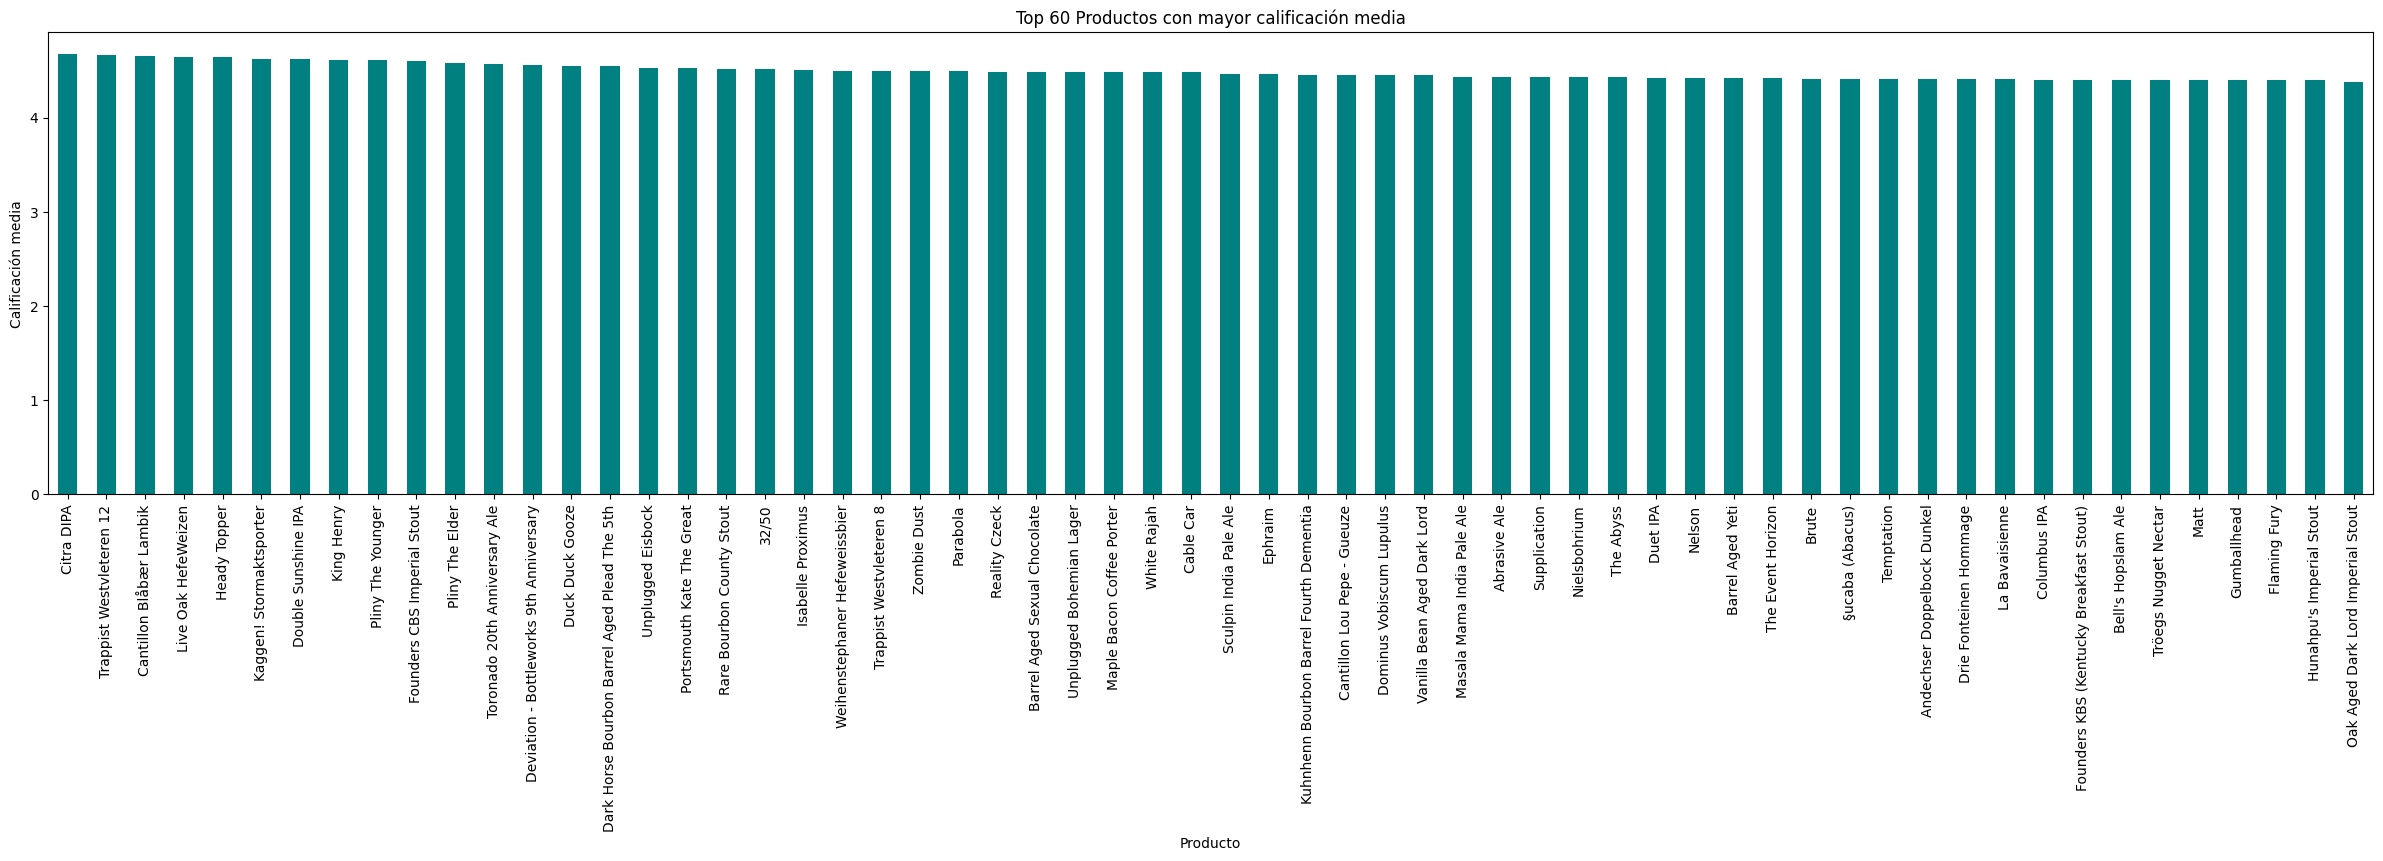

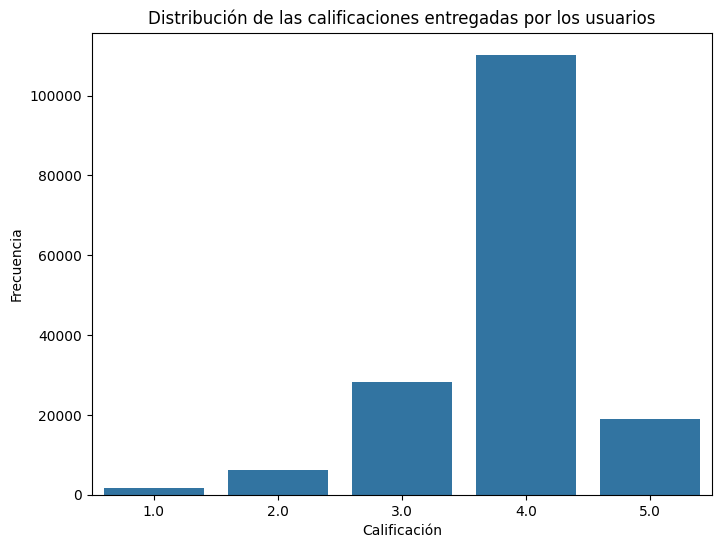

In [48]:
# 1. Análisis descriptivo y gráfico de los datos

# 1.1. ¿Cuántos usuarios hay en los datos?
num_usuarios = df_cervezas['userId'].nunique()
print(f"Cantidad de usuarios: {num_usuarios}")

# 1.2. ¿Cuántos productos hay en los datos?
num_productos = df_cervezas['beerId'].nunique()
print(f"Cantidad de productos: {num_productos}")

# 1.3. ¿Cuántas calificaciones hay en los datos?
num_calificaciones = len(df_cervezas)
print(f"Cantidad de calificaciones: {num_calificaciones}")

# 1.4. ¿Cuántas calificaciones faltantes hay en los datos?
num_calificaciones_faltantes = df.isnull().sum().sum()
print(f"Cantidad de calificaciones faltantes: {num_calificaciones_faltantes}")

# 1.5. ¿Cuál es la media de las calificaciones entregadas por los usuarios?
mean_rating = df_cervezas['rating'].mean()
print(f"Media de las calificaciones entregadas por los usuarios: {mean_rating:.2f}")

# 1.6. ¿Cómo cambia esto a través de los productos?
# Calculamos la media de calificación por producto
mean_rating_by_product = df_cervezas.groupby('beerName')['rating'].mean().sort_values(ascending=False)

# Gráfico de las calificaciones medias por producto
plt.figure(figsize=(30, 6))
mean_rating_by_product.head(60).plot(kind='bar', color='teal')
plt.title('Top 60 Productos con mayor calificación media')
plt.xlabel('Producto')
plt.ylabel('Calificación media')
plt.xticks(rotation=90)
plt.show()

# 1.7. Gráfico de la distribución de las calificaciones entregadas por los usuarios
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=df_cervezas, order=[1.0, 2.0, 3.0, 4.0, 5.0])

plt.title('Distribución de las calificaciones entregadas por los usuarios')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.show()

In [49]:
# 2. Transformar los datos a una matriz (usuario, producto)

# Crear la matriz usuario-producto
user_product_matrix = df_cervezas.pivot_table(index='userId', columns='beerId', values='rating')

# Mostrar los primeros 5 registros de la matriz
print("Matriz usuario-producto (primeras filas):")
print(user_product_matrix.head())

Matriz usuario-producto (primeras filas):
beerId  5         6         7         9         10        11        14     \
userId                                                                      
1         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3       3.395  3.765217  3.256849  3.478261       NaN       NaN       NaN   
4         NaN       NaN       NaN       NaN  3.791908       NaN       NaN   
5         NaN       NaN       NaN       NaN       NaN  3.431818       NaN   
6         NaN       NaN       NaN       NaN       NaN       NaN  3.892157   

beerId  15     17     19     ...  74491  74530  74548  74579  74634  74827  \
userId                       ...                                             
1         NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
3         NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
4         NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
5         NaN    NaN    NaN 

## 2.2 Método Basado en Contenido [4 puntos]

<center>
<img src ="https://is1-ssl.mzstatic.com/image/thumb/WfNa_TwFpJoTWXQmU-BrbA/1200x675.jpg" width = 500 />

Como primera tarea, Homero le pide centrarse en las características de las cervezas y no en la interacción de los ciudadanos con esta. Adicionalmente, Homero le quiere regalar un pack de distintas cervezas a Carl en agradecimiento a su ayuda anterior, el cual se enteró que Carl tiene un `userId = 100`. Por ende, Homero le pide las siguientes acciones:

1. Cree un dataframe que contenga las características de las cervezas, excluyendo las evaluaciones de los ciudadanos. `Nota:` No considere valores duplicados. [1 punto]
2. Implemente el método Bag of Words para procesar la columna `beerStyle`. Para ello, transforme las palabras a minúsculas, elimine stopwords en inglés y filtre las palabras que aparezcan en 10 documentos como mínimo. Guarde su resultado como un DataFrame. [1 punto].
> `Nota:` Le puede ser útil esta [documentacion](https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) y el método `.get_feature_names_out()`.
3. Cree una función que imprima las top 5 cervezas similares a `Chocolate Porter`, utilizando como medida de similitud la similitud coseno. [1 punto]
4. Identifique la cerveza mejor evaluada por Carl (`userId = 100`) y obtenga las top 5 cervezas similares a esa cerveza. [1 punto]

**Respuesta:**

In [50]:
# 1. Crear un dataframe con las características de las cervezas, excluyendo las evaluaciones de los ciudadanos

# Crear un dataframe que contenga solo las características de las cervezas (sin las evaluaciones)
df_cervezas_characteristics = df_cervezas[['beerId', 'beerName', 'beerStyle']].drop_duplicates().reset_index(drop=True)

# Mostrar el resultado
print("Dataframe con las características de las cervezas (sin evaluaciones):")
df_cervezas_characteristics.head()

Dataframe con las características de las cervezas (sin evaluaciones):


,beerId,beerName,beerStyle
0,995,Mai Bock,Maibock / Helles Bock
1,58695,Hop In The Dark Cascadian Dark Ale,American Black Ale
2,4083,Stone Ruination IPA,American Double / Imperial IPA
3,40310,Noël Des Géants,Herbed / Spiced Beer
4,1904,Sierra Nevada Celebration Ale,American IPA


In [51]:
# 2. Implementar el método Bag of Words para procesar la columna `beerStyle`
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Inicializamos el CountVectorizer con los parámetros adecuados
vectorizer = CountVectorizer(lowercase=True, stop_words=list(ENGLISH_STOP_WORDS), min_df=10)

# Aplicamos el vectorizador sobre la columna `beerStyle`
X = vectorizer.fit_transform(df_cervezas_characteristics['beerStyle'])

# Convertimos el resultado a un DataFrame para visualización
df_bow = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Mostrar el dataframe resultante
print("Bag of Words para la columna `beerStyle`:")
print(df_bow.head())

Bag of Words para la columna `beerStyle`:
   adjunct  ale  altbier  amber  american  apa  baltic  barleywine  beer  \
0        0    0        0      0         0    0       0           0     0   
1        0    1        0      0         1    0       0           0     0   
2        0    0        0      0         1    0       0           0     0   
3        0    0        0      0         0    0       0           0     1   
4        0    0        0      0         1    0       0           0     0   

   belgian  ...  vienna  warmer  wee  weizenbock  wheat  wheatwine  wild  \
0        0  ...       0       0    0           0      0          0     0   
1        0  ...       0       0    0           0      0          0     0   
2        0  ...       0       0    0           0      0          0     0   
3        0  ...       0       0    0           0      0          0     0   
4        0  ...       0       0    0           0      0          0     0   

   winter  witbier  zwickel  
0       0     

In [52]:
# 3. Función para imprimir las top 5 cervezas similares a `Chocolate Porter` usando similitud coseno

from sklearn.metrics.pairwise import cosine_similarity

def top_5_similar_beers(target_beer_name, df_cervezas_characteristics, df_bow):
    # Encontrar el índice de la cerveza objetivo
    target_idx = df_cervezas_characteristics[df_cervezas_characteristics['beerName'] == target_beer_name].index[0]

    # Obtener el vector de características para la cerveza objetivo
    target_vector = df_bow.iloc[target_idx].values.reshape(1, -1)

    # Calcular la similitud coseno entre la cerveza objetivo y todas las demás cervezas
    cosine_similarities = cosine_similarity(target_vector, df_bow)

    # Obtener los índices de las cervezas más similares (excluyendo la cerveza misma)
    similar_indices = cosine_similarities[0].argsort()[-6:-1]  # Top 5 similares

    # Mostrar las 5 cervezas más similares
    similar_beers = df_cervezas_characteristics.iloc[similar_indices]
    return similar_beers

# Imprimir las top 5 cervezas similares a "Chocolate Porter"
similar_beers = top_5_similar_beers("Chocolate Porter", df_cervezas_characteristics, df_bow)
print("\nTop 5 cervezas similares a `Chocolate Porter`:")
print(similar_beers[['beerName']])


Top 5 cervezas similares a `Chocolate Porter`:
                        beerName
1168  Arctic Rhino Coffee Porter
3178            State Pen Porter
3176        Cowboy Coffee Porter
2559       Red Eye Coffee Porter
729       Saint Bridget's Porter


In [53]:
# 4. Identificar la cerveza mejor evaluada por Carl y obtener las top 5 cervezas similares

# Obtener las calificaciones de Carl (userId = 100)
carl_ratings = df_cervezas[df_cervezas['userId'] == 100]

# Encontrar la cerveza mejor evaluada por Carl
best_rated_beer = carl_ratings.loc[carl_ratings['rating'].idxmax()]

# Obtener el nombre de la cerveza mejor evaluada
best_beer_name = best_rated_beer['beerName']

# Imprimir el nombre de la cerveza mejor evaluada
print(f"\nLa cerveza mejor evaluada por Carl es: {best_beer_name}")

# Obtener las top 5 cervezas similares a esta cerveza
similar_beers_carl = top_5_similar_beers(best_beer_name, df_cervezas_characteristics, df_bow)
print("\nTop 5 cervezas similares a la cerveza mejor evaluada por Carl:")
print(similar_beers_carl[['beerName']])


La cerveza mejor evaluada por Carl es: McNeill's Extra Special Bitter

Top 5 cervezas similares a la cerveza mejor evaluada por Carl:
                                  beerName
1847                          The Wise ESB
384                            Redhook ESB
1864  XS Imperial Younger's Special Bitter
3484                   Phoenixx Double ESB
3543       S.O.B. (Special Old Bitter Ale)


## 2.3 Filtros Colaborativos [16 puntos]

<center>
<img src ="https://i.makeagif.com/media/2-08-2016/McmGFQ.gif" width = 400 />

Después de consolidarse como el Barón de la Cerveza en Springfield, Homero Simpson decidió llevar su negocio clandestino a otro nivel. Al ser el único proveedor de alcohol en la ciudad, quiere asegurarse de que cada cerveza que elabora sea de la mejor calidad posible. Para lograrlo, planea usar las evaluaciones pasadas que los ciudadanos de Springfield han registrado sobre las distintas cervezas. Inspirado por los consejos de su amigo Moe, Homero se enteró de que puede implementar un sistema de recomendación basado en filtros colaborativos.

Ahora, Homero necesita de su ayuda para diseñar y elaborar distintos sistemas de filtros colaborativos que le permitan continuar con su reinado cervecero.

### 2.3.1 Filtros Colaborativos Basados en Memoria [8 puntos]

Para este tipo de filtros, Homero le pide lo siguiente:

1. Transforme el DataFrame de `pandas` a Dataset de `surprise`. `Hint`: Utilice solamente los identificadores de ciudadano, cerveza y rating. ¿Importa el orden? [1 punto]
2. Genere un conjunto de entrenamiento y uno de prueba, asegurando que el 30% de los datos sea destinado al conjunto de prueba. No olvide fijar una semilla para garantizar reproducibilidad. [1 punto]
3. Entrene un modelo de **KNN basado en usuarios** utilizando la `similitud coseno`. Luego realice predicciones en el conjunto de prueba. `Nota`: Le puede ser útil la siguiente [documentación](https://surprise.readthedocs.io/en/stable/knn_inspired.html) [2 puntos]
4. Calcule el MAE (Mean Absolute Error) de las predicciones realizadas por el modelo y muestre las predicciones en un DataFrame para su análisis. `Nota:` Le puede ser útil la siguiente [documentación](https://surprise.readthedocs.io/en/stable/accuracy.html#surprise.accuracy.mae) [2 puntos]
5. Repita los pasos 3 y 4 pero utilizando un modelo de **KNN basado en los productos**. [2 puntos]

**Respuesta:**

In [54]:
# 1. Transformar el DataFrame de pandas a Dataset de surprise

from surprise import Dataset
from surprise import Reader

# Definir el lector para 'surprise'
reader = Reader(rating_scale=(1, 5))  # El rango de las calificaciones va de 1 a 5

# Convertir el dataframe de pandas a Dataset de surprise
data = Dataset.load_from_df(df_cervezas[['userId', 'beerId', 'rating']], reader)

# Mostrar un resumen de los datos cargados
print("Resumen del Dataset de surprise:")
print(data)

Resumen del Dataset de surprise:


In [55]:
# 2. Generar un conjunto de entrenamiento y uno de prueba

from surprise.model_selection import train_test_split

# Dividir el dataset en 70% entrenamiento y 30% prueba
trainset, testset = train_test_split(data, test_size=0.3, random_state=42)

# Mostrar un resumen del conjunto de entrenamiento y prueba
print(f"Entrenamiento: {trainset.n_ratings} datos")
print(f"Prueba: {len(testset)} datos")

Entrenamiento: 206541 datos
Prueba: 88518 datos


In [56]:
# 3. Entrenar un modelo KNN basado en usuarios utilizando similitud coseno

from surprise import KNNBasic
from surprise import accuracy

# Configuración para el algoritmo KNN basado en usuarios
sim_options = {
    'name': 'cosine',  # Tipo de similitud: coseno
    'user_based': True  # Modelo basado en usuarios
}

# Crear el modelo KNN
model_knn_user = KNNBasic(sim_options=sim_options)

# Entrenar el modelo con el conjunto de entrenamiento
model_knn_user.fit(trainset)

# Realizar predicciones en el conjunto de prueba
predictions_user = model_knn_user.test(testset)

# Mostrar las primeras predicciones
print("Primeras predicciones con KNN basado en usuarios:")
for pred in predictions_user[:5]:
    print(pred)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Primeras predicciones con KNN basado en usuarios:
user: 1628       item: 9755       r_ui = 4.50   est = 4.20   {'actual_k': 40, 'was_impossible': False}
user: 187        item: 601        r_ui = 2.00   est = 3.83   {'actual_k': 40, 'was_impossible': False}
user: 112        item: 409        r_ui = 3.00   est = 3.86   {'actual_k': 40, 'was_impossible': False}
user: 738        item: 5051       r_ui = 4.00   est = 4.03   {'actual_k': 37, 'was_impossible': False}
user: 141        item: 4394       r_ui = 4.00   est = 3.89   {'actual_k': 40, 'was_impossible': False}


In [57]:
# 4. Calcular MAE y mostrar las predicciones
# Calcular el MAE en el conjunto de prueba
mae_user = accuracy.mae(predictions_user, verbose=True)
print(f"MAE (KNN basado en usuarios): {mae_user:.4f}")

# Convertir las predicciones a un DataFrame para análisis
predictions_df_user = pd.DataFrame([(pred.uid, pred.iid, pred.r_ui, pred.est) for pred in predictions_user],
                                   columns=['userId', 'beerId', 'actual_rating', 'predicted_rating'])

# Mostrar las primeras predicciones en el DataFrame
print("\nPredicciones KNN basado en usuarios:")
print(predictions_df_user.head())

MAE:  0.4639
MAE (KNN basado en usuarios): 0.4639

Predicciones KNN basado en usuarios:
   userId  beerId  actual_rating  predicted_rating
0    1628    9755            4.5          4.200000
1     187     601            2.0          3.825000
2     112     409            3.0          3.862500
3     738    5051            4.0          4.027027
4     141    4394            4.0          3.887500


In [58]:
# 5. Entrenar un modelo KNN basado en productos utilizando similitud cosen

# Configuración para el algoritmo KNN basado en productos
sim_options_product = {
    'name': 'cosine',  # Tipo de similitud: coseno
    'user_based': False  # Modelo basado en productos
}

# Crear el modelo KNN basado en productos
model_knn_product = KNNBasic(sim_options=sim_options_product)

# Entrenar el modelo con el conjunto de entrenamiento
model_knn_product.fit(trainset)

# Realizar predicciones en el conjunto de prueba
predictions_product = model_knn_product.test(testset)

# Calcular el MAE para el modelo basado en productos
mae_product = accuracy.mae(predictions_product)
print(f"\nMAE (KNN basado en productos): {mae_product:.4f}")

# Convertir las predicciones a un DataFrame para análisis
predictions_df_product = pd.DataFrame([(pred.uid, pred.iid, pred.r_ui, pred.est) for pred in predictions_product],
                                      columns=['userId', 'beerId', 'actual_rating', 'predicted_rating'])

# Mostrar las primeras predicciones en el DataFrame
print("\nPredicciones KNN basado en productos:")
print(predictions_df_product.head())

Computing the cosine similarity matrix...
Done computing similarity matrix.
MAE:  0.4640

MAE (KNN basado en productos): 0.4640

Predicciones KNN basado en productos:
   userId  beerId  actual_rating  predicted_rating
0    1628    9755            4.5          4.200000
1     187     601            2.0          3.825000
2     112     409            3.0          3.862500
3     738    5051            4.0          4.000615
4     141    4394            4.0          3.887500


### 2.3.2 Filtros Colaborativos Basados en Modelo [8 puntos]

Ahora Homero le pide que cambie el enfoque del tipo de filtro colaborativo a uno basado en modelo. Por ende, Homero le pide lo siguiente:

1. Entrene un modelo `NMF` , asegurándose de fijar la semilla para reproducibilidad. Luego genere predicciones para el conjunto de prueba. [2 puntos]
2. Calcule el MAE de las predicciones obtenidas y muestre los resultados de las predicciones en un DataFrame para su analisis. [1 punto]
3. Entrene un modelo `SVD` sobre el conjunto de entrenamiento. Posteriormente, genere las predicciones para el conjunto de prueba. [2 puntos]
4. Calcule el MAE de las predicciones y muestre los resultados de las predicciones en un DataFrame. [1 punto]
5. Compare los resultados de ambos modelos y seleccione el mejor a su criterio. Justifique. [2 puntos]

**Respuesta**

In [59]:
# 1. Entrenar un modelo NMF y generar predicciones para el conjunto de prueba

from surprise import NMF

model_nmf = NMF(random_state=42)

# Entrenar el modelo NMF con el conjunto de entrenamiento
model_nmf.fit(trainset)

# Realizar predicciones en el conjunto de prueba
predictions_nmf = model_nmf.test(testset)

# Mostrar las primeras predicciones
print("Primeras predicciones con el modelo NMF:")
for pred in predictions_nmf[:5]:
    print(pred)

Primeras predicciones con el modelo NMF:
user: 1628       item: 9755       r_ui = 4.50   est = 3.68   {'was_impossible': False}
user: 187        item: 601        r_ui = 2.00   est = 3.71   {'was_impossible': False}
user: 112        item: 409        r_ui = 3.00   est = 3.97   {'was_impossible': False}
user: 738        item: 5051       r_ui = 4.00   est = 3.77   {'was_impossible': False}
user: 141        item: 4394       r_ui = 4.00   est = 3.91   {'was_impossible': False}


In [60]:
# 2. Calcular el MAE y mostrar las predicciones en un DataFrame
# Calcular el MAE para el modelo NMF
mae_nmf = accuracy.mae(predictions_nmf)
print(f"MAE (Modelo NMF): {mae_nmf:.4f}")

# Convertir las predicciones a un DataFrame para análisis
predictions_df_nmf = pd.DataFrame([(pred.uid, pred.iid, pred.r_ui, pred.est) for pred in predictions_nmf],
                                   columns=['userId', 'beerId', 'actual_rating', 'predicted_rating'])

# Mostrar las primeras predicciones
print("\nPredicciones del modelo NMF:")
print(predictions_df_nmf.head())

MAE:  0.4826
MAE (Modelo NMF): 0.4826

Predicciones del modelo NMF:
   userId  beerId  actual_rating  predicted_rating
0    1628    9755            4.5          3.682730
1     187     601            2.0          3.714152
2     112     409            3.0          3.973135
3     738    5051            4.0          3.767895
4     141    4394            4.0          3.910392


In [61]:
# 3. Entrenar un modelo SVD y generar predicciones para el conjunto de prueba

from surprise import SVD

model_svd = SVD(random_state=42)

# Entrenar el modelo SVD con el conjunto de entrenamiento
model_svd.fit(trainset)

# Realizar predicciones en el conjunto de prueba
predictions_svd = model_svd.test(testset)

# Mostrar las primeras predicciones
print("Primeras predicciones con el modelo SVD:")
for pred in predictions_svd[:5]:
    print(pred)

Primeras predicciones con el modelo SVD:
user: 1628       item: 9755       r_ui = 4.50   est = 4.02   {'was_impossible': False}
user: 187        item: 601        r_ui = 2.00   est = 3.81   {'was_impossible': False}
user: 112        item: 409        r_ui = 3.00   est = 3.89   {'was_impossible': False}
user: 738        item: 5051       r_ui = 4.00   est = 4.01   {'was_impossible': False}
user: 141        item: 4394       r_ui = 4.00   est = 3.93   {'was_impossible': False}


In [62]:
# 4. Calcular el MAE y mostrar las predicciones en un DataFrame

# Calcular el MAE para el modelo SVD
mae_svd = accuracy.mae(predictions_svd)
print(f"MAE (Modelo SVD): {mae_svd:.4f}")

# Convertir las predicciones a un DataFrame para análisis
predictions_df_svd = pd.DataFrame([(pred.uid, pred.iid, pred.r_ui, pred.est) for pred in predictions_svd],
                                   columns=['userId', 'beerId', 'actual_rating', 'predicted_rating'])

# Mostrar las primeras predicciones
print("\nPredicciones del modelo SVD:")
print(predictions_df_svd.head())

MAE:  0.4610
MAE (Modelo SVD): 0.4610

Predicciones del modelo SVD:
   userId  beerId  actual_rating  predicted_rating
0    1628    9755            4.5          4.022229
1     187     601            2.0          3.807105
2     112     409            3.0          3.885699
3     738    5051            4.0          4.014968
4     141    4394            4.0          3.926274


In [63]:
# 5. Comparar los resultados de ambos modelos y seleccionar el mejor

# Comparar los MAE de los dos modelos
print(f"\nMAE (Modelo NMF): {mae_nmf:.4f}")
print(f"MAE (Modelo SVD): {mae_svd:.4f}")

# Análisis comparativo
if mae_nmf < mae_svd:
    print("\nEl modelo NMF tiene un mejor desempeño con un MAE más bajo.")
else:
    print("\nEl modelo SVD tiene un mejor desempeño con un MAE más bajo.")


MAE (Modelo NMF): 0.4826
MAE (Modelo SVD): 0.4610

El modelo SVD tiene un mejor desempeño con un MAE más bajo.


## 2.4 El Mejor Filtro Colaborativo [7 puntos]

<center>
<img src ="https://media.giphy.com/media/citBl9yPwnUOs/giphy.gif" width = 400 />

Homero Simpson desea perfeccionar y extender su sistema de recomendaciones para cervezas en Springfield. En esta fase, busca implementar técnicas que le permitan no solo predecir las preferencias de los ciudadanos, sino también evaluar métricas que midan la eficacia de sus recomendaciones. Con el objetivo de recomendar las mejores K cervezas para usuarios específicos, Homero buscará comprender mejor cómo optimizar su sistema y satisfacer a sus clientes.

Para ello, usted ayudará a Homero realizando las siguientes labores:

1. Implemente la función `get_top_n()` que le permita extraer las `N` mejores cervezas recomendadas para cada ciudadano utilizando las predicciones generadas por el mejor modelo seleccionado en la sección anterior. Luego obtenga las `3` mejores cervezas recomendadas para Carl (`userId = 100`). `Hint`: Para cada ciudadano, elimine las predicciones duplicadas. [2 puntos]
2. Realice predicciones de rating para 5 cervezas aleatorias no evaluadas por Carl, para estimar las calificaciones que Carl podría darles. [1 punto]
3. Calcule los promedios de `precisión@k` y el `recall@k` para `k=10` y `threshold = 3.5`. Analice sus resultados. ¿Es un buen modelo? `Hint:` Utilice la función dada `precision_recall_at_k(...)`. [1 punto]
4. Calcule la `precisión@k` y el `recall@k` para valores de `k` que varíen entre 3 y 25 con paso de 1 unidad. Luego, grafique los resultados y analice el comportamiento de las curvas de precisión y recall en función de `k`. [1 punto]
5. Calcule la `precisión@k` y el `recall@k` para valores de `threshold` que varíen entre 3.0 y 4.5, con paso de 0.1. Luego, grafique los resultados y analice el comportamiento de las curvas de precisión y recall en función de `threshold`. [1 punto]
6. Finalmente utilice el mejor modelo para estimar los ratings faltantes. Muestre sus resultados en una matriz (usuario, producto) sin valores nulos. [1 punto]



In [64]:
#NO MODIFICAR ESTA CELDA
def precision_recall_at_k(predictions, k=10, threshold=3.5):

    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))
    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
        n_rel_and_rec_k = sum(
            ((true_r >= threshold) and (est >= threshold))
            for (est, true_r) in user_ratings[:k]
        )
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    return precisions, recalls

**Respuesta:**

In [66]:
# 1. Función para obtener las N mejores cervezas recomendadas por usuario

from collections import defaultdict

def get_top_n(predictions, n=10):
    """
    Retorna las N mejores predicciones por usuario, eliminando duplicados.
    """
    # Agrupar predicciones por usuario
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Ordenar y quedarse con las top n sin duplicados
    for uid, user_ratings in top_n.items():
        # Eliminar posibles duplicados
        unique_ratings = list({beer_id: rating for beer_id, rating in user_ratings}.items())
        # Ordenar de mayor a menor estimación
        unique_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = unique_ratings[:n]

    return top_n

# Obtener las top 3 cervezas recomendadas para Carl (userId = 100)
top_n = get_top_n(predictions_svd, n=3)

print("Top 3 cervezas recomendadas para Carl (userId = 100):")
if 100 in top_n:
    for beer_id, rating in top_n[100]:
        beer_name = df_cervezas.loc[df_cervezas['beerId'] == int(beer_id), 'beerName'].iloc[0]
        print(f"- {beer_name} (estimado: {rating:.2f})")
else:
    print("Carl no tiene recomendaciones disponibles.")

Top 3 cervezas recomendadas para Carl (userId = 100):
- McNeill's Firehouse Amber Ale (estimado: 3.94)
- McNeill's Extra Special Bitter (estimado: 3.93)
- McNeill's Dead Horse IPA (estimado: 3.76)


In [67]:
# 2. Predicciones para 5 cervezas aleatorias no evaluadas por Carl

import random

# Obtener las cervezas que Carl ya evaluó
carl_rated = df_cervezas[df_cervezas['userId'] == 100]['beerId'].unique()

# Seleccionar 5 cervezas que Carl no ha evaluado
all_beers = df_cervezas['beerId'].unique()
unrated_beers = list(set(all_beers) - set(carl_rated))
sample_beers = random.sample(unrated_beers, 5)

# Generar predicciones para esas cervezas
predictions_carl = [model_svd.predict(uid=100, iid=beer_id) for beer_id in sample_beers]

# Mostrar resultados
print("Predicciones de rating para 5 cervezas no evaluadas por Carl:")
for pred in predictions_carl:
    beer_name = df_cervezas.loc[df_cervezas['beerId'] == int(pred.iid), 'beerName'].iloc[0]
    print(f"- {beer_name}: estimado {pred.est:.2f}")

Predicciones de rating para 5 cervezas no evaluadas por Carl:
- Rabbid Rabbit: estimado 3.77
- Tripel Crown: estimado 3.62
- White Hawk Original IPA: estimado 3.59
- Harpoon Leviathan - Quad: estimado 3.76
- Rio Blanco Pale Ale: estimado 3.85


In [72]:
# 3. Calcular precisión@k y recall@k para k=10 y threshold=3.5

from collections import defaultdict

precisions, recalls = precision_recall_at_k(predictions_svd, k=10, threshold=3.5)

# Calcular los promedios
mean_precision = sum(prec for prec in precisions.values()) / len(precisions)
mean_recall = sum(rec for rec in recalls.values()) / len(recalls)

print(f"Precisión@10 promedio: {mean_precision:.4f}")
print(f"Recall@10 promedio: {mean_recall:.4f}")

Precisión@10 promedio: 0.7433
Recall@10 promedio: 0.3399


Estos valores indican que el modelo de recomendaciones presenta un buen nivel de precisión, pero un recall moderado.

* La precisión alta (≈0.74) significa que, en promedio, el 74% de las cervezas recomendadas en el Top-10 por el sistema fueron efectivamente relevantes (es decir, Carl o los usuarios similares realmente las habrían calificado con más de 3.5 puntos)..

* El recall más bajo (≈0.34) indica que, aunque el modelo acierta bien cuando recomienda, no logra cubrir todas las cervezas relevantes que podrían haber interesado a los usuarios.

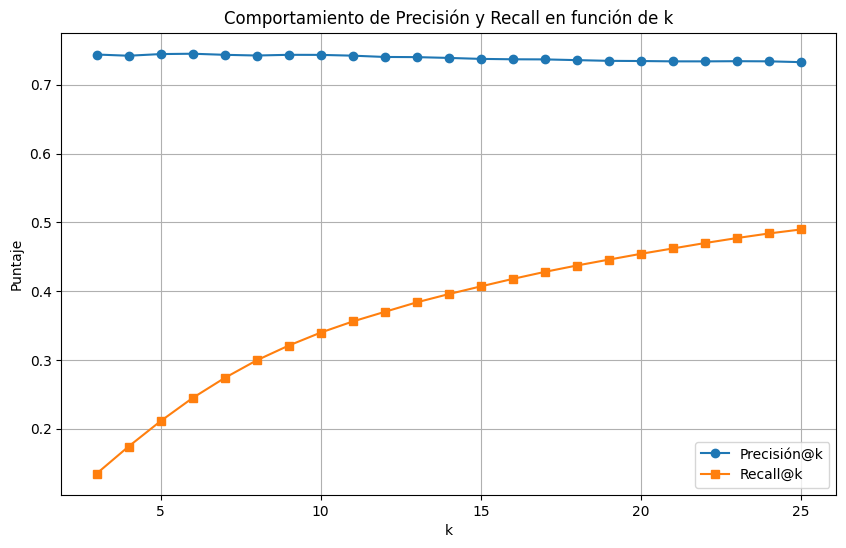

In [69]:
# 4. Calcular precisión@k y recall@k para k entre 3 y 25

import matplotlib.pyplot as plt

k_values = range(3, 26)
precision_scores = []
recall_scores = []

for k in k_values:
    precisions, recalls = precision_recall_at_k(predictions_svd, k=k, threshold=3.5)
    precision_scores.append(sum(prec for prec in precisions.values()) / len(precisions))
    recall_scores.append(sum(rec for rec in recalls.values()) / len(recalls))

# Graficar resultados
plt.figure(figsize=(10, 6))
plt.plot(k_values, precision_scores, marker='o', label='Precisión@k')
plt.plot(k_values, recall_scores, marker='s', label='Recall@k')
plt.xlabel('k')
plt.ylabel('Puntaje')
plt.title('Comportamiento de Precisión y Recall en función de k')
plt.legend()
plt.grid(True)
plt.show()


1. **Precisión@k**:

La precisión se mantiene constante (≈ 0.74) a lo largo de todo el rango de valores de k (de 3 a 25). Esto indica que, aunque aumentemos el número de recomendaciones, el modelo sigue acertando de manera similar. No se está agregando ruido innecesario en las recomendaciones adicionales, lo que es un buen indicador de que el modelo mantiene su efectividad.

2. **Recall@k**:

A diferencia de la precisión, el recall muestra un comportamiento monótono creciente a medida que k aumenta. Inicialmente, para valores bajos de k, el recall es bajo (aproximadamente 0.2), pero aumenta progresivamente hasta alcanzar aproximadamente 0.5 cuando k = 25. Esto refleja que, a medida que se recomienda un mayor número de cervezas, el modelo cubre más cervezas relevantes para el usuario (es decir, cubre más cervezas que podrían ser de su agrado).


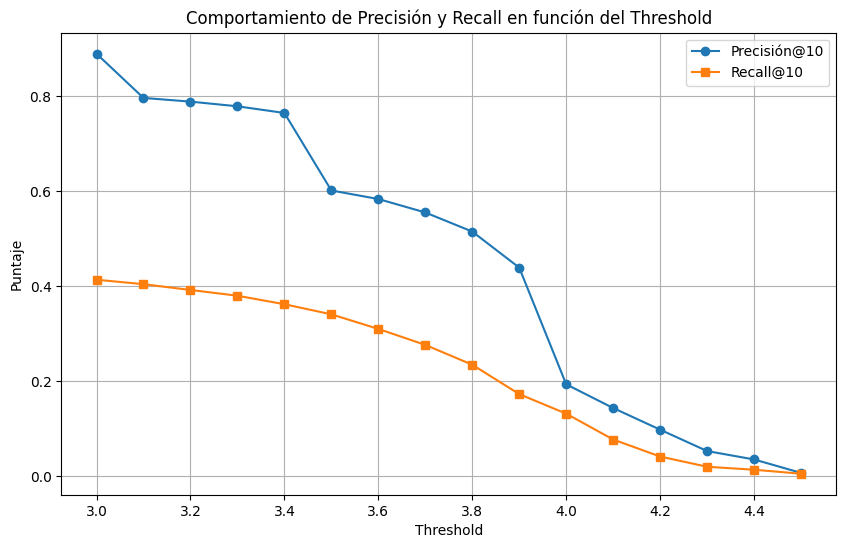

In [70]:
# 5. Calcular precisión@k y recall@k para distintos thresholds

threshold_values = np.arange(3.0, 4.6, 0.1)
precision_scores_th = []
recall_scores_th = []

for t in threshold_values:
    precisions, recalls = precision_recall_at_k(predictions_svd, k=10, threshold=t)
    precision_scores_th.append(sum(prec for prec in precisions.values()) / len(precisions))
    recall_scores_th.append(sum(rec for rec in recalls.values()) / len(recalls))

# Graficar resultados
plt.figure(figsize=(10, 6))
plt.plot(threshold_values, precision_scores_th, marker='o', label='Precisión@10')
plt.plot(threshold_values, recall_scores_th, marker='s', label='Recall@10')
plt.xlabel('Threshold')
plt.ylabel('Puntaje')
plt.title('Comportamiento de Precisión y Recall en función del Threshold')
plt.legend()
plt.grid(True)
plt.show()

#### Comportamiento de la Precisión@10 (Curva azul)

* Alto al principio: Cuando el threshold es bajo (cerca de 3.0), la precisión es alta (alrededor de 0.9). Esto indica que las recomendaciones son muy precisas al principio, es decir, las cervezas recomendadas a menudo tienen una alta probabilidad de ser bien calificadas por el usuario.
* Disminuye abruptamente: A medida que el umbral aumenta (a partir de 3.5), la precisión disminuye de forma notable, alcanzando valores mucho más bajos (aproximadamente 0.5 a 0.6 cuando el threshold está cerca de 4.0). Esto sugiere que al aumentar el umbral, las recomendaciones deben ser más selectivas, y a medida que esto sucede, el modelo es menos certero en las recomendaciones que hace.
* Sigue disminuyendo: Después de cierto punto (cerca de 4.0), la precisión sigue cayendo hasta estabilizarse en un nivel bajo (alrededor de 0.2-0.3). Esto indica que, si se requieren calificaciones más altas (es decir, si el umbral es alto), el modelo comienza a recomendar cervezas menos relevantes o más difíciles de evaluar positivamente.

#### Comportamiento del Recall@10 (Curva naranja)

* Inicia bajo: Cuando el threshold es bajo (cerca de 3.0), el recall también es bajo (aproximadamente 0.4). Esto indica que el modelo está recomendando muchas cervezas, pero no todas son relevantes o bien evaluadas.
* Aumenta gradualmente: A medida que el threshold sube, el recall mejora. Esto tiene sentido porque, a medida que sube el umbral, el modelo comienza a recomendar más cervezas relevantes que los usuarios probablemente calificarían bien (por encima del umbral de 3.5).
* Se estabiliza: A medida que el threshold continúa aumentando, el recall se estabiliza en torno a 0.2-0.3, lo que indica que, a pesar de que ahora el modelo solo recomienda cervezas que cumplen el umbral de calificación, no está logrando cubrir una gran parte de las cervezas relevantes que podrían interesar al usuario.

In [71]:
# 6. Estimar los ratings faltantes con el mejor modelo y crear una matriz sin nulos

# Crear lista de todos los pares usuario-cerveza posibles
unique_users = df_cervezas['userId'].unique()
unique_beers = df_cervezas['beerId'].unique()

# Crear predicciones completas
all_predictions = []
for user in unique_users:
    for beer in unique_beers:
        all_predictions.append(model_svd.predict(user, beer))

# Convertir predicciones a DataFrame
pred_matrix_df = pd.DataFrame([(pred.uid, pred.iid, pred.est) for pred in all_predictions],
                              columns=['userId', 'beerId', 'predicted_rating'])

# Transformar en matriz usuario-producto
full_matrix = pred_matrix_df.pivot(index='userId', columns='beerId', values='predicted_rating')

print("Matriz usuario-producto con ratings estimados (sin valores nulos):")
print(full_matrix.head())

Matriz usuario-producto con ratings estimados (sin valores nulos):
beerId     5         6         7         9         10        11        14     \
userId                                                                         
1       3.771808  3.971141  3.720676  3.882143  3.757660  3.723489  3.813681   
3       3.336556  3.770683  3.198733  3.574974  3.471261  3.414303  3.587438   
4       3.803890  4.098655  3.708163  3.970690  3.815027  3.795536  3.981101   
5       3.716707  4.018249  3.625999  3.769685  3.614239  3.588676  3.911910   
6       3.776749  4.029568  3.609475  3.768090  3.663695  3.719147  4.041253   

beerId     15        17        19     ...     74491     74530     74548  \
userId                                ...                                 
1       3.840708  3.728672  3.985592  ...  3.587676  4.142827  3.990992   
3       3.534744  3.423763  3.688587  ...  3.531858  3.825967  3.692859   
4       3.957826  3.815549  4.054364  ...  3.865464  4.215030  4.142220 

# Conclusión

Éxito!
<center>
<img src ="https://i.gifer.com/origin/cb/cbd80e6045652ab123caffef72f29210_w200.gif" width = 400 />
